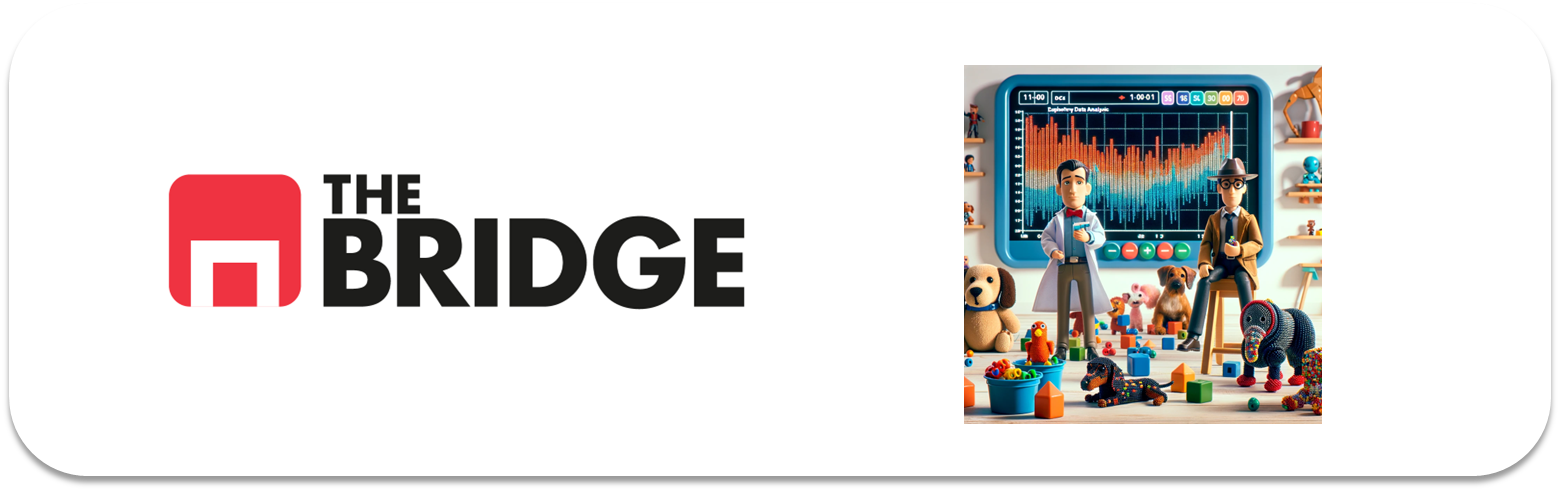

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools_copy import pinta_distribucion_categoricas, plot_categorical_relationship_fin, graficos_dispersión_combinados 
from bootcampviztools_copy import grafico_dispersion_con_correlacion, plot_grouped_histograms,plot_grouped_boxplots,plot_combined_graphs
from bootcampviztools_copy import plot_categorical_numerical_relationship, plot_categorical_relationship_fin

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [72]:
df_titanic = pd.read_csv(r"./data/titanic.csv")
df_titanic.head(1)

survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [73]:
df_titanic.drop(columns=["deck","survived", "pclass", "embarked" ], axis=1, inplace=True)


In [74]:
df_titanic.head(1)

sex   age  sibsp  parch  fare  class  who  adult_male  embark_town alive  \
0  male  22.0      1      0  7.25  Third  man        True  Southampton    no   

   alone  
0  False

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [75]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch","sibsp" ], axis=1, inplace=True)



In [76]:
df_titanic.head(10)

sex   age     fare   class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500   Third    man        True  Southampton    no  False   
1  female  38.0  71.2833   First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250   Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000   First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500   Third    man        True  Southampton    no   True   
5    male   NaN   8.4583   Third    man        True   Queenstown    no   True   
6    male  54.0  51.8625   First    man        True  Southampton    no   True   
7    male   2.0  21.0750   Third  child       False  Southampton    no  False   
8  female  27.0  11.1333   Third  woman       False  Southampton   yes  False   
9  female  14.0  30.0708  Second  child       False    Cherbourg   yes  False   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  
5               0  
6               0  
7               4  
8               2  
9               1

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [77]:
df_titanic.embark_town.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [78]:
moda_embark = df_titanic.embark_town.mode()
moda_embark

0    Southampton
Name: embark_town, dtype: object

In [79]:
df_titanic["embark_town"].fillna(moda_embark, inplace=True)

In [80]:
df_titanic.embark_town.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [81]:
df_titanic.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [82]:
media_age=df_titanic["age"].mean()

In [83]:
df_titanic["age"].fillna(media_age, inplace=True)

In [84]:
df_titanic.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [151]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

In [86]:


cardinalidad= pd.DataFrame([df_titanic.nunique(), (df_titanic.nunique()/len(df_titanic)*100), df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
cardinalidad



Card     %_Card     Tipo
sex               2   0.224467   object
age              89   9.988777  float64
fare            248  27.833895  float64
class             3     0.3367   object
who               3     0.3367   object
adult_male        2   0.224467     bool
embark_town       3     0.3367   object
alive             2   0.224467   object
alone             2   0.224467     bool
family_members    9   1.010101    int64

In [87]:
df_titanic.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [88]:
columnas_1_6= [ "who", "sex", "alive"]

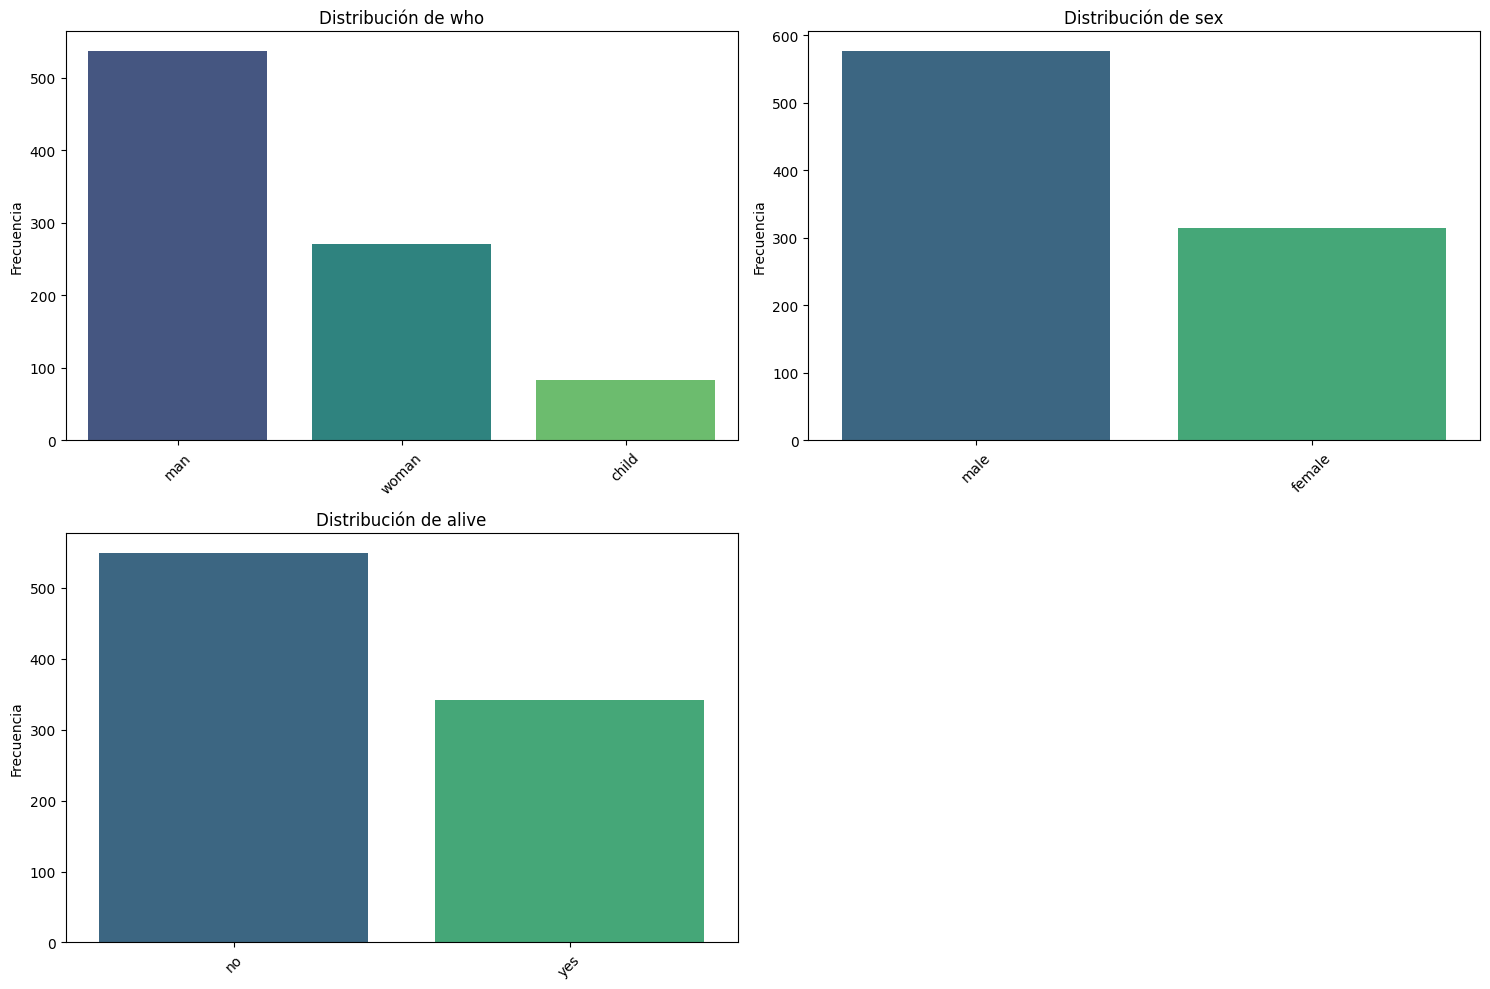

In [89]:
pinta_distribucion_categoricas(df_titanic, columnas_1_6)

In [155]:
tabla_contingencia = pd.crosstab(df_titanic['who'], df_titanic['sex'])# categoricas

tabla_contingencia

sex    female  male
who                
child      43    40
man         0   537
woman     271     0

In [156]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])# categoricas

tabla_contingencia

who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205

In [157]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['sex'])# categoricas

tabla_contingencia

sex    female  male
alive              
no         81   468
yes       233   109

In [90]:

#hallamos la frecuencia absoluta
for catego in columnas_1_6:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para sex
sex
male      577
female    314
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64





In [91]:
#hallamos la frecuencia relativa
for catego in columnas_1_6:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64





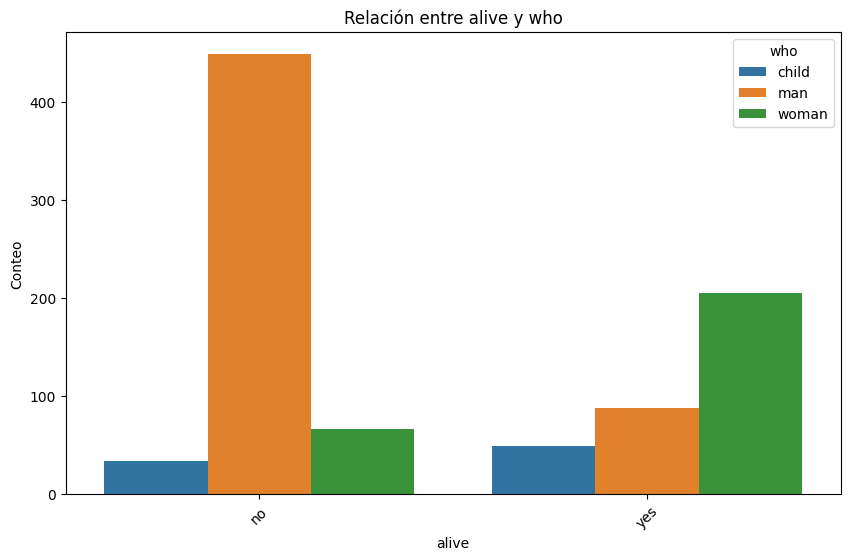

In [92]:

plot_categorical_relationship_fin(df_titanic,"alive","who",relative_freq=False, show_values=False, size_group = 5)

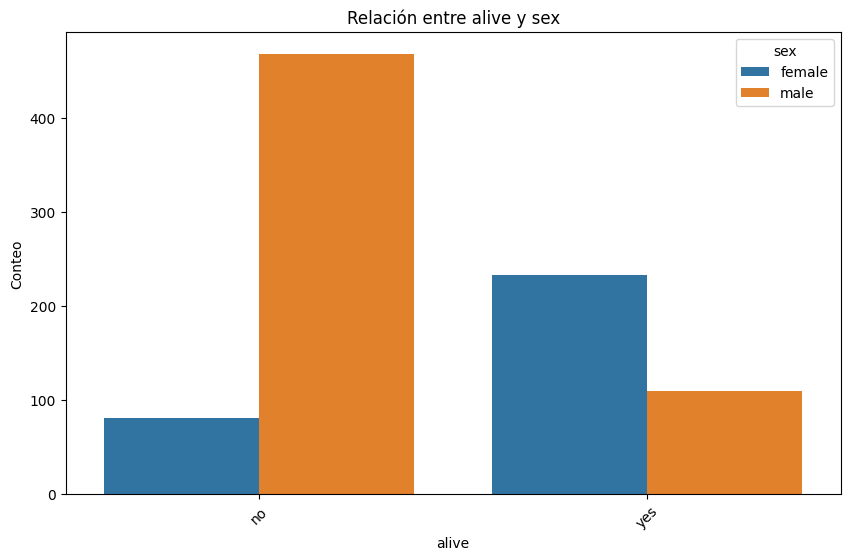

In [93]:
plot_categorical_relationship_fin(df_titanic,"alive","sex",relative_freq=False, show_values=False, size_group = 5)

En terminos absolutos como relativo, viendo las graficas de relaciones de alive con who y sex, y las frecuecias absolutas y relativas, se puede afirmar que hubo mas hombres que mujeres y niños fallecidos, ya que hay un mayor porcentaje de hombres que de mujeres y niños, y se lo comparamos en las columa "sexo", donde mujeres y niños se unen a sus respectivos generos, sigue existiendo una diferencia significativa el genero masculino y femeninos,  indicando un mayor numero de hombres que mujeres y niños fallecidos.

1A. Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

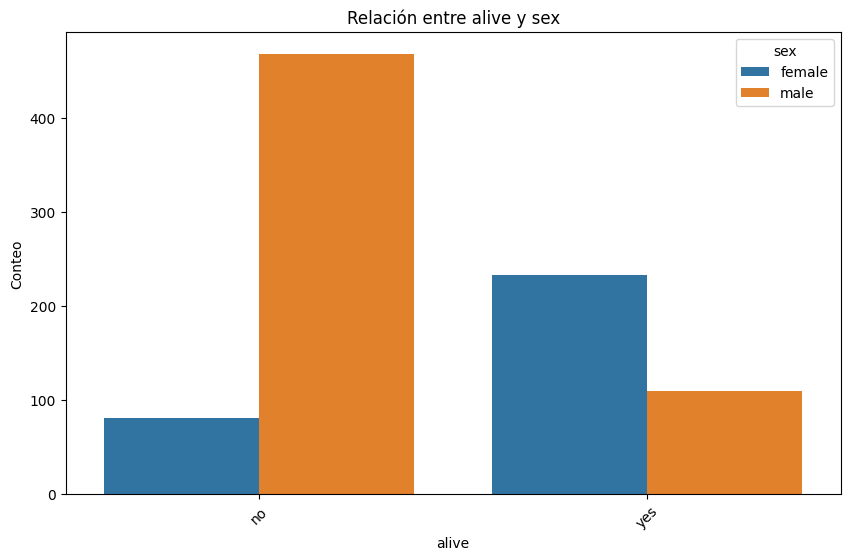

In [94]:
plot_categorical_relationship_fin(df_titanic,"alive","sex",relative_freq=False, show_values=False, size_group = 5)

Teniendo en cuenta los datos aportados y la grafica arriba expuesta, fallecieron un total de 549 personas y sobrevieron 349. En el barco iban un total de 891 personas, divididos en 537 hombres, 271 mujeres y 83 niños, concretamente 40 niños (577-537) y 43 niñas.<br>
Si tenemos en cuenta estos datos, si existe cierta importancia estadistica significativa ,tanto entre el sexo y el indice de supervivencia o entre ser adulto o niño, habida cuenta que fallecieron 549 personas y el total de hombres fue 537, sin embargo sobreviveron 342 personas, cifra muy cercana a los 354 mujeres y niños que iban en el barco, maxime que en esos tiempos era normal salvar a mujeres y niños primero.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [95]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

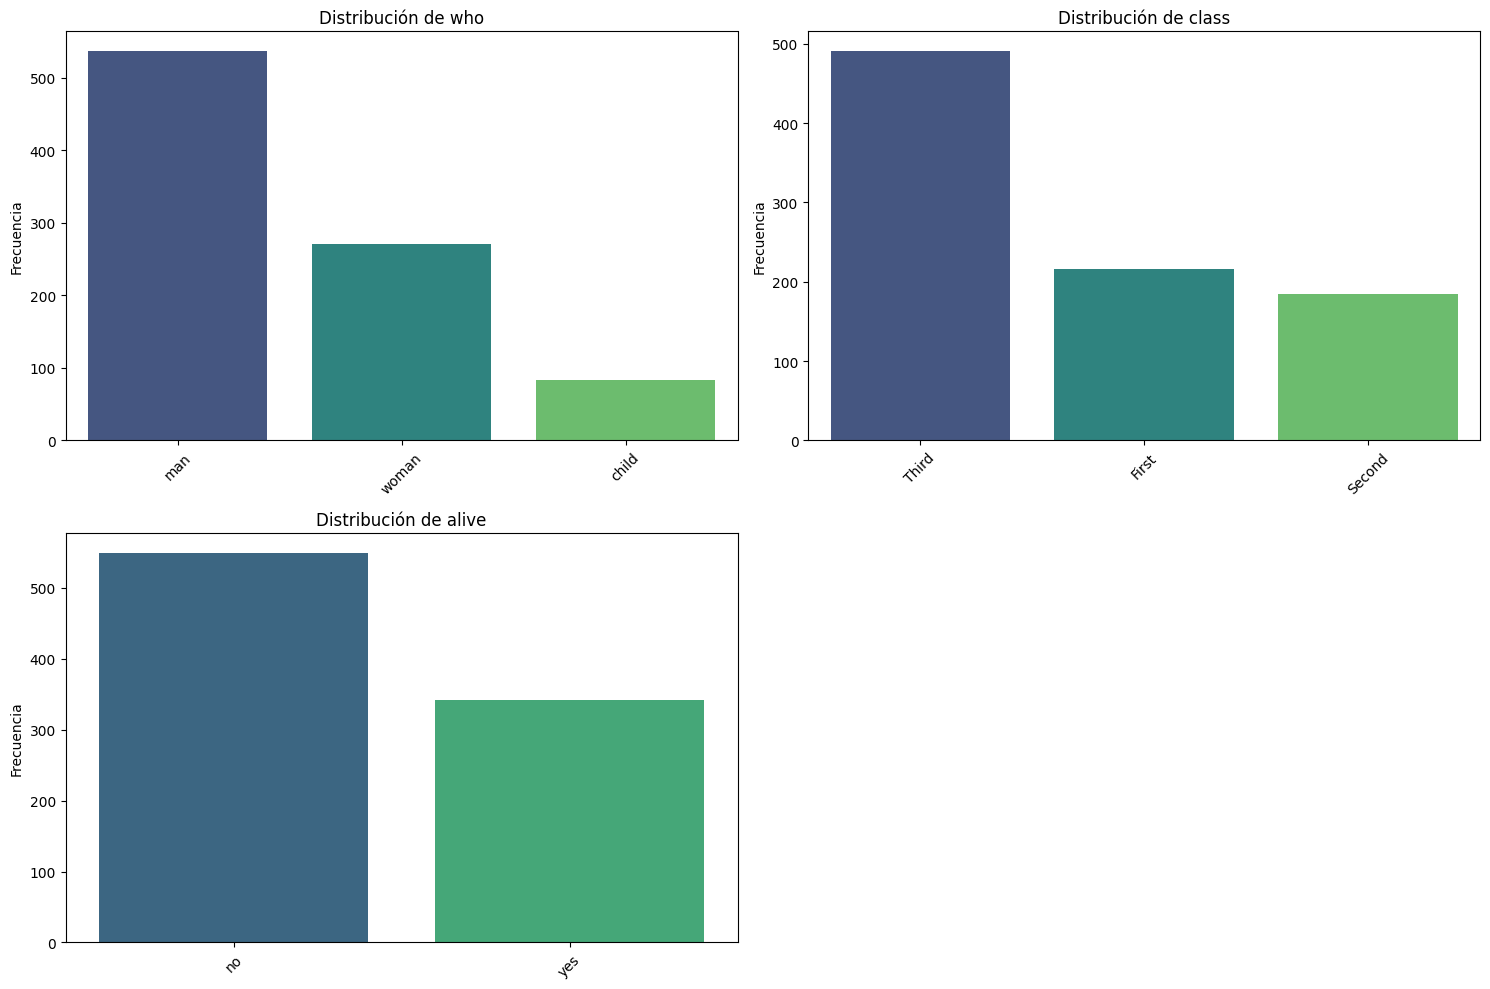

In [96]:
columnas_clase= [ "who", "class", "alive"]
pinta_distribucion_categoricas(df_titanic, columnas_clase)

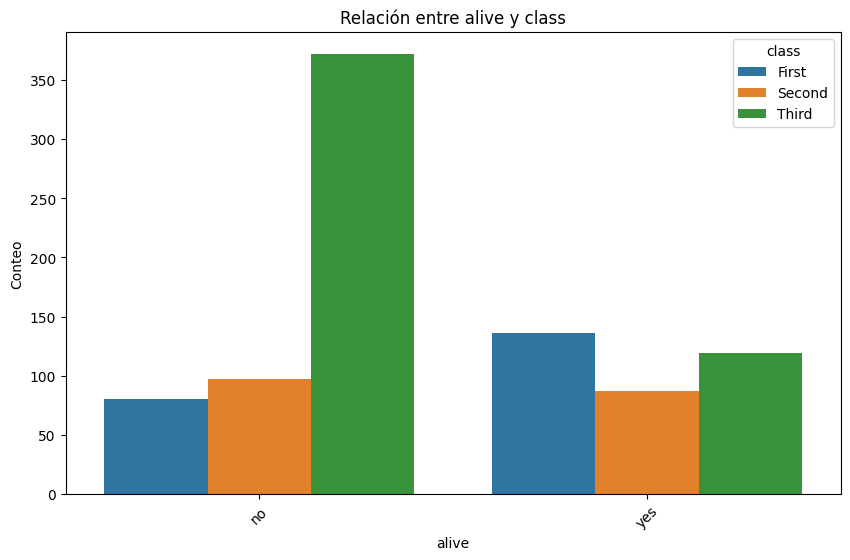

In [97]:
plot_categorical_relationship_fin(df_titanic,"alive","class",relative_freq=False, show_values=False, size_group = 5)

En terminos absolutos, hay un total de 491 personas que viajaban en 3 clase, lo que equivale a un 55,10 % del total de pasajeros, en 1 clase viajaban 214 y en 2 clase un total de 184, y viendo la grafica de arriba donde se compara alive con class queda demostrado con los datos que tenemos que  hubo un mayor numero de fallecidos de 3 clase, pudiendo estar esta situacion relacionada a dos factores: su mayor nùmero y el hecho que en todos los barcos las clases van en relacion a la cercania a la cubierta, por lo que se reduce significavamente la posibilidad de superviviencia.<br> En relacion a los supervientes,  el mayor numero de ellos fue  de primera y tercera clase, aqunue las diferencias entre las clases de los supervivientes no son muy significativas

In [98]:
#hallamos la frecuencia absoluta
for catego in columnas_clase:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64





In [99]:
#hallamos la frecuencia  relativa
for catego in columnas_clase:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64






3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [100]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

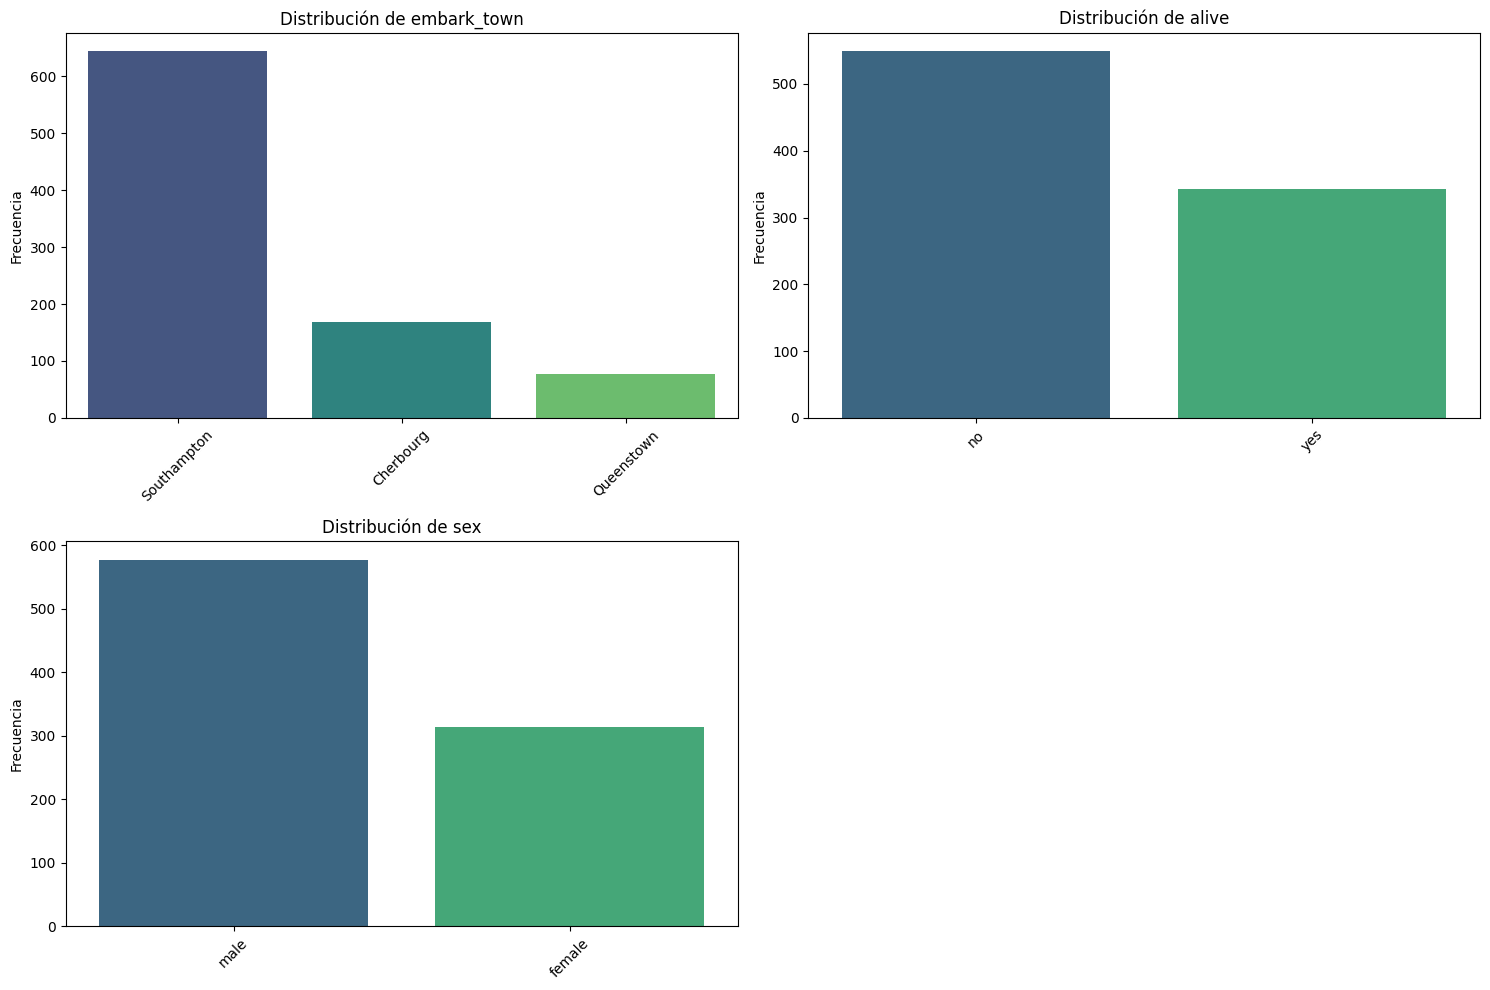

In [101]:
columnas_ciudad= ["embark_town","alive","sex"]
pinta_distribucion_categoricas(df_titanic, columnas_ciudad)

In [102]:
#hallamos la frecuencia  relativa
for catego in columnas_ciudad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para embark_town
embark_town
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64



para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64





In [103]:
#hallamos la frecuencia absoluta
for catego in columnas_ciudad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64



para sex
sex
male      577
female    314
Name: count, dtype: int64





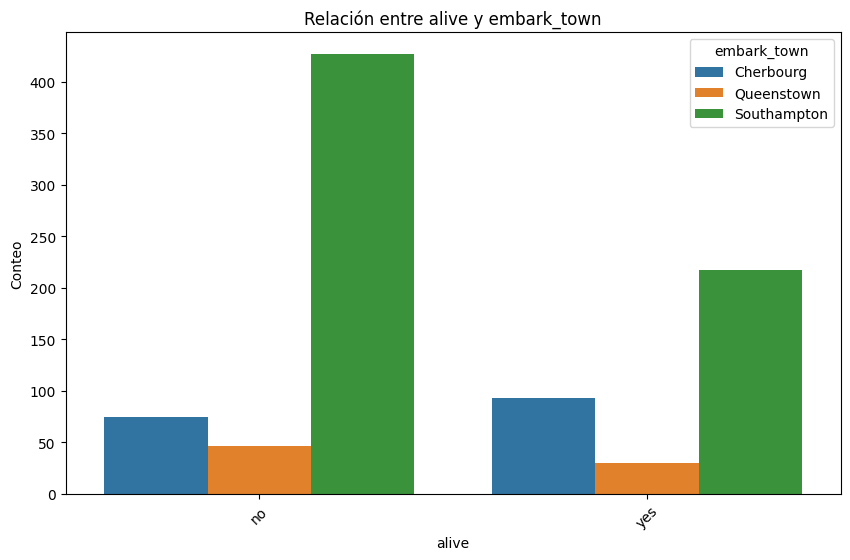

In [104]:
plot_categorical_relationship_fin(df_titanic,"alive","embark_town",relative_freq=False, show_values=False, size_group = 5)

La ciudad donde embarcaron el mayor numero de fallecidos coincide con la ciudad de partida del viaje del Titanic: Southampton, siendo tambien de esa ciudad donde hubo mayor numero de supervivientes,  exisiendo claramente una cierta relacion estadistica significativa, debido a que en ese puerto embarcaron el 72.27 % del total de pasajeros (644), por lo que las posibilidades de ocurrirle algun hecho era mucho mayor en estas pèrsonas que en al 27,49% restante.

In [105]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

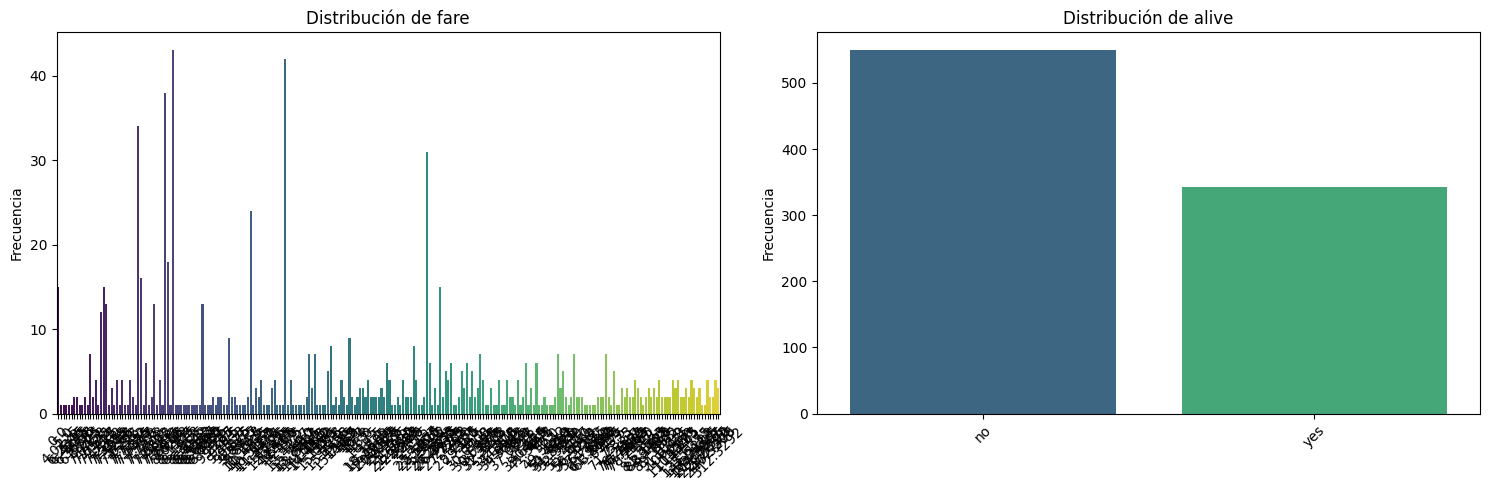

In [106]:
columnas_precio =["fare", "alive" ]
pinta_distribucion_categoricas(df_titanic, columnas_precio)

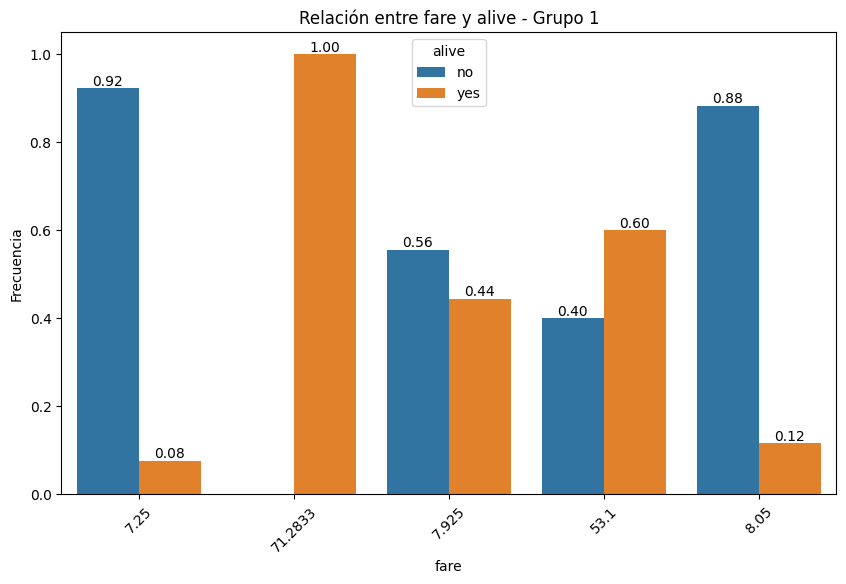

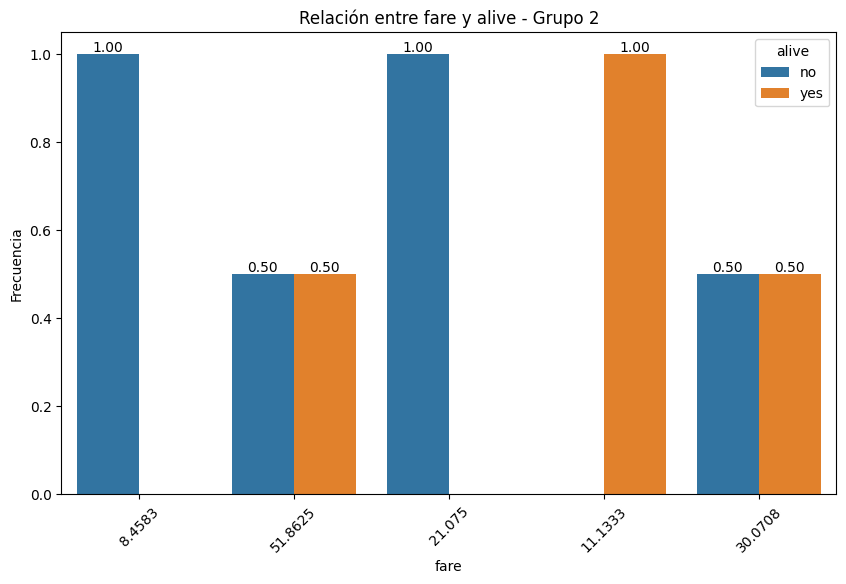

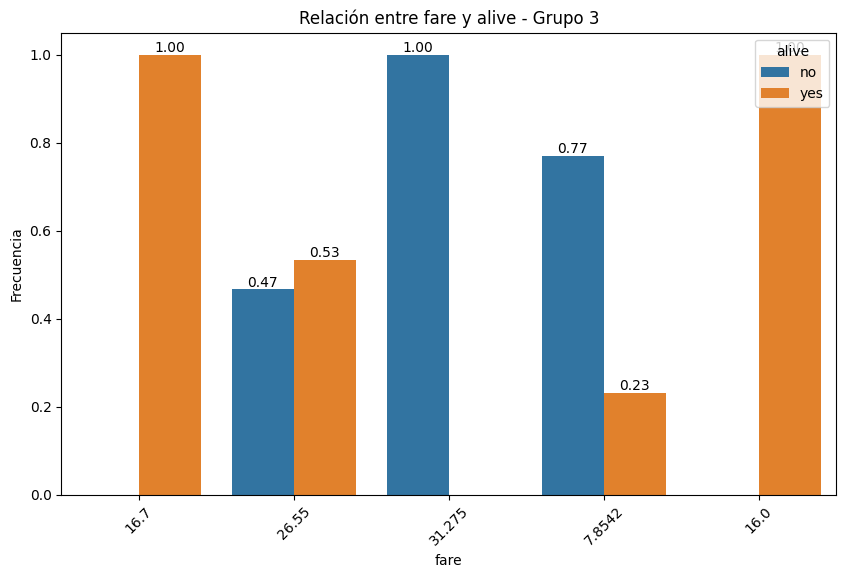

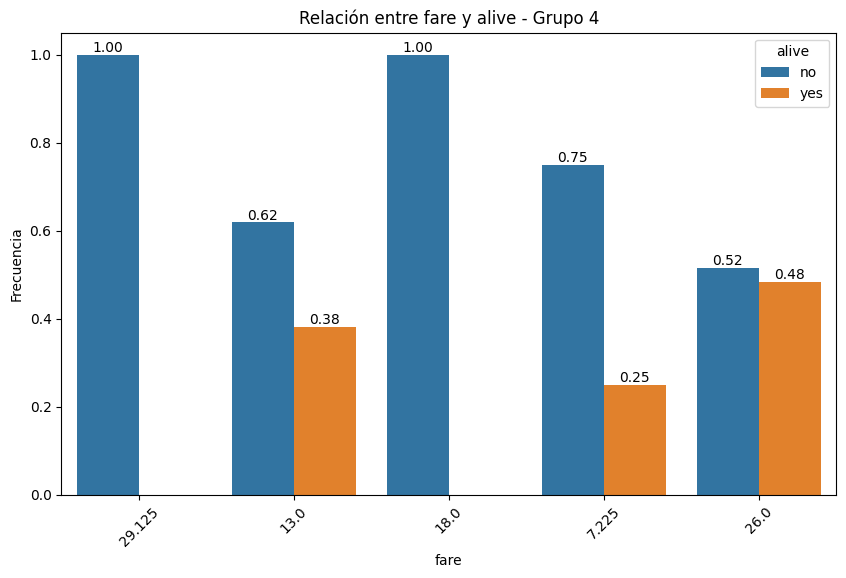

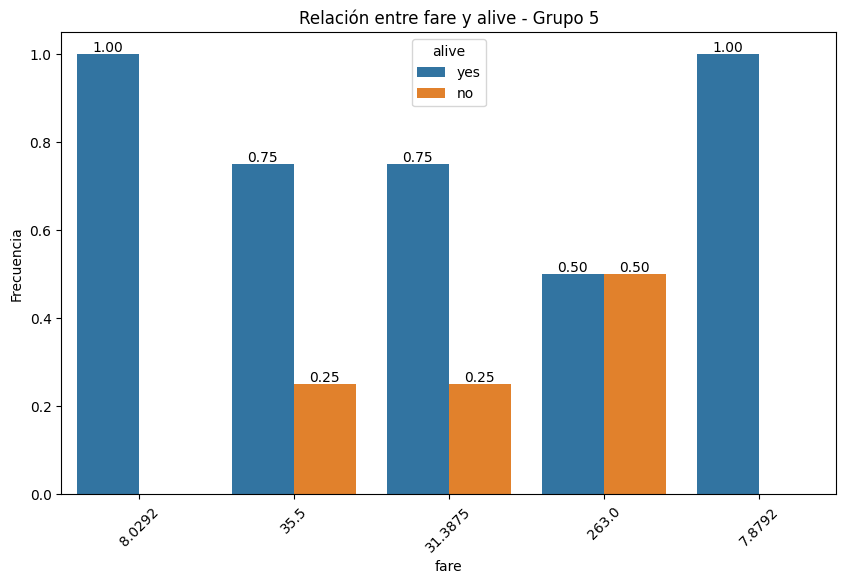

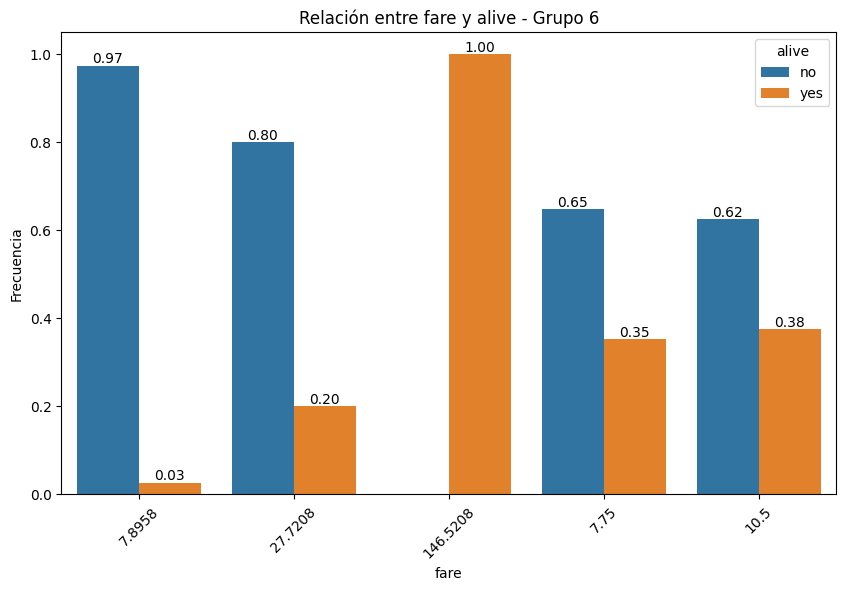

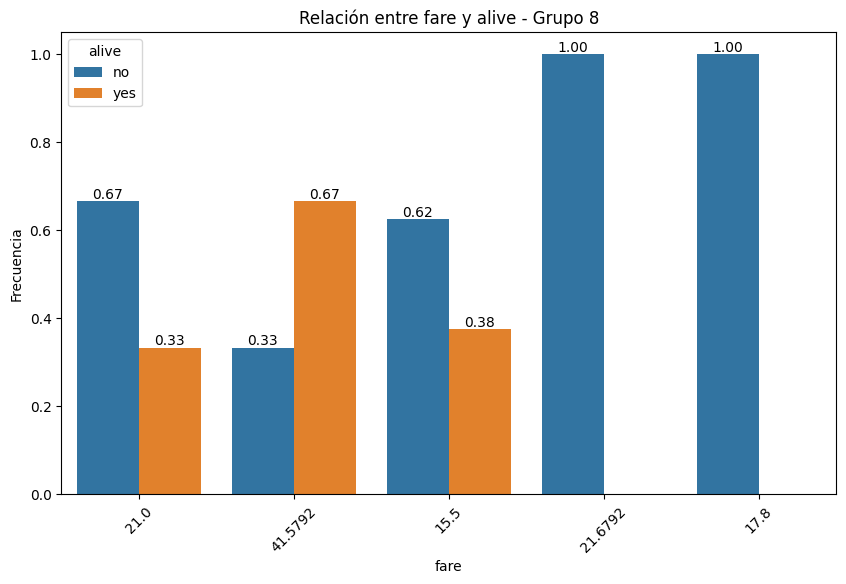

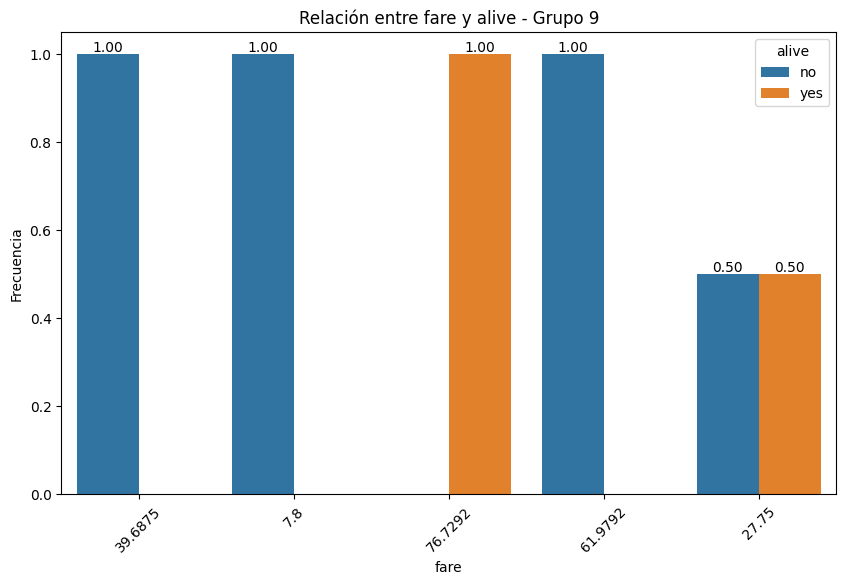

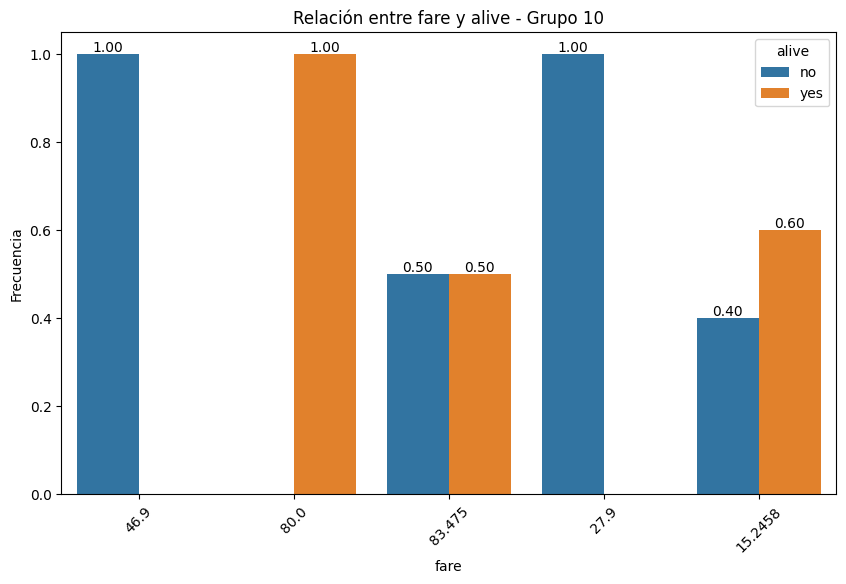

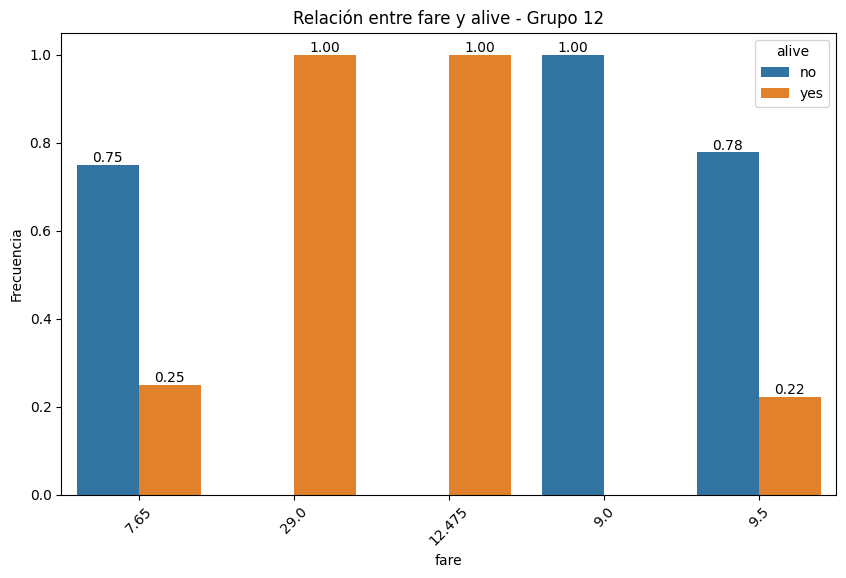

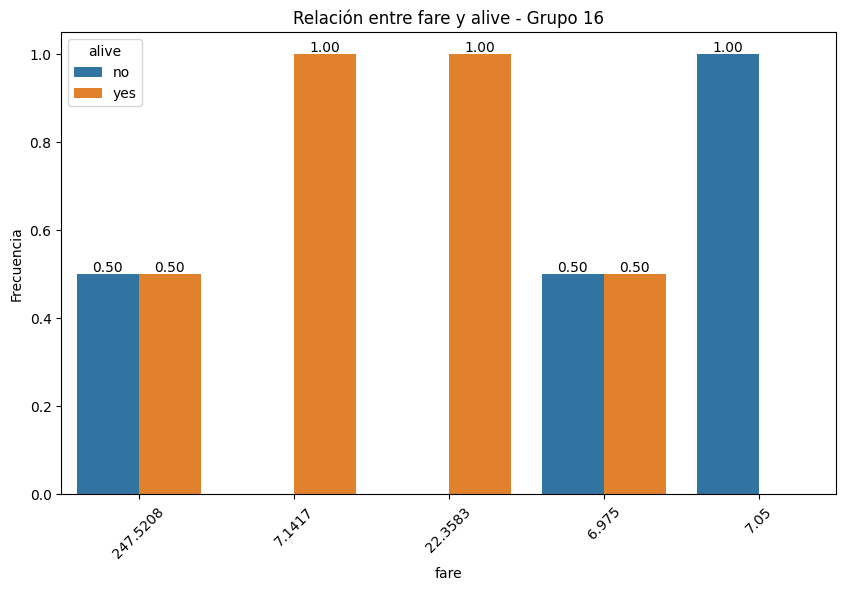

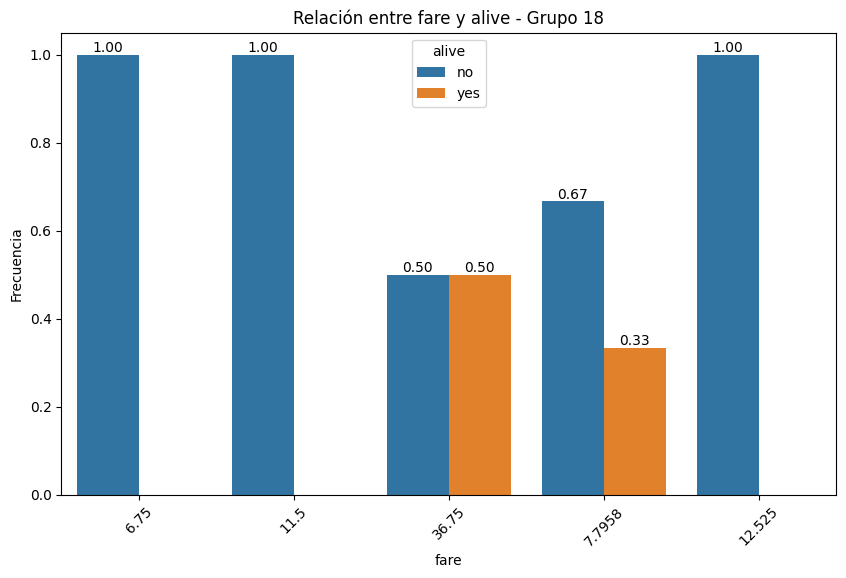

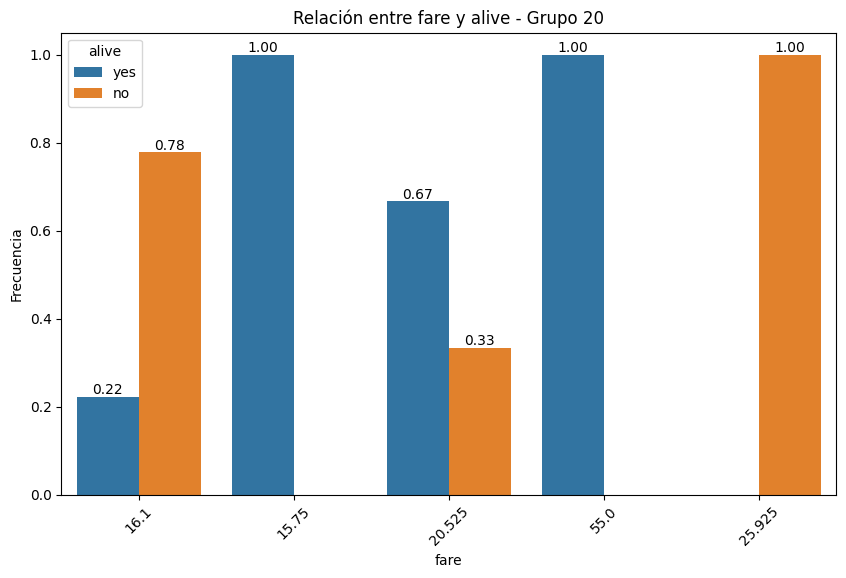

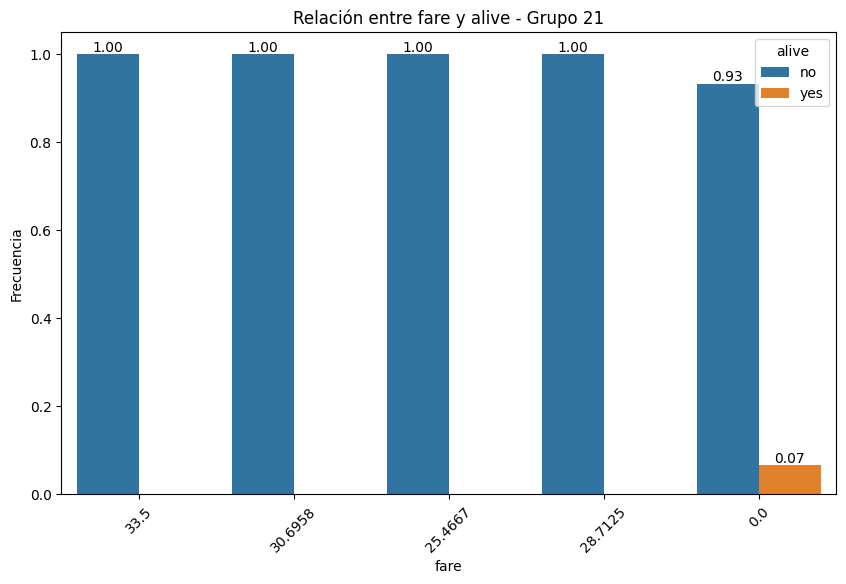

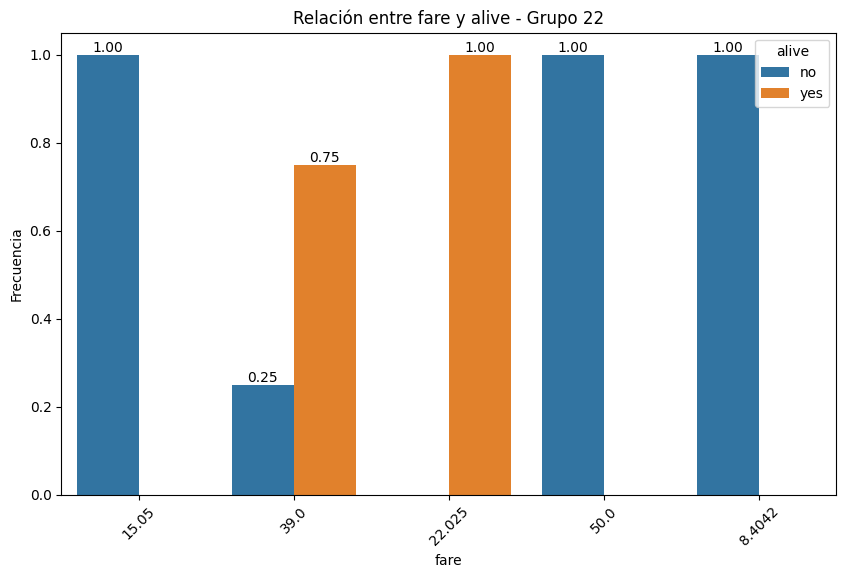

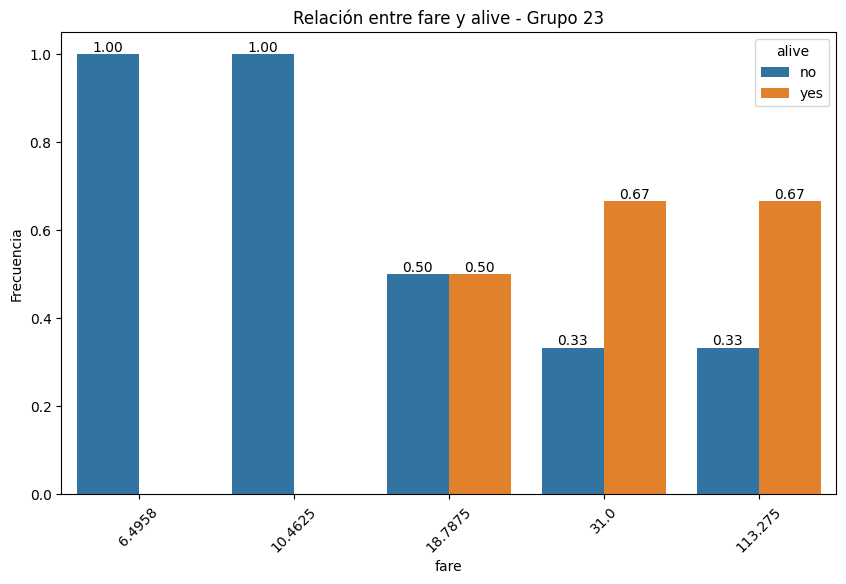

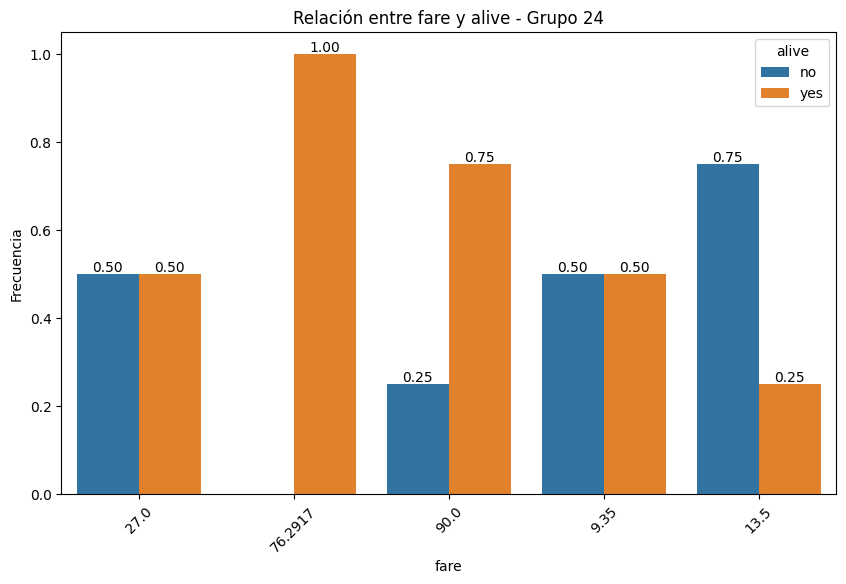

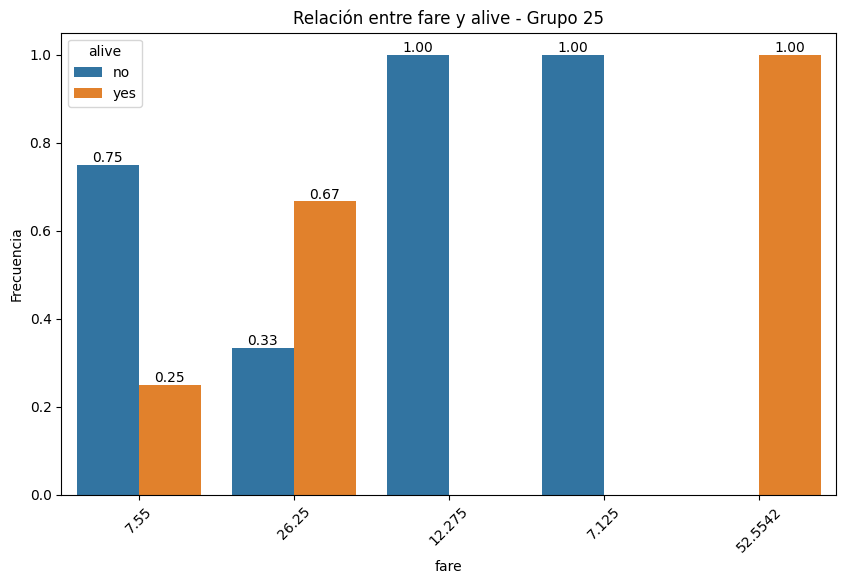

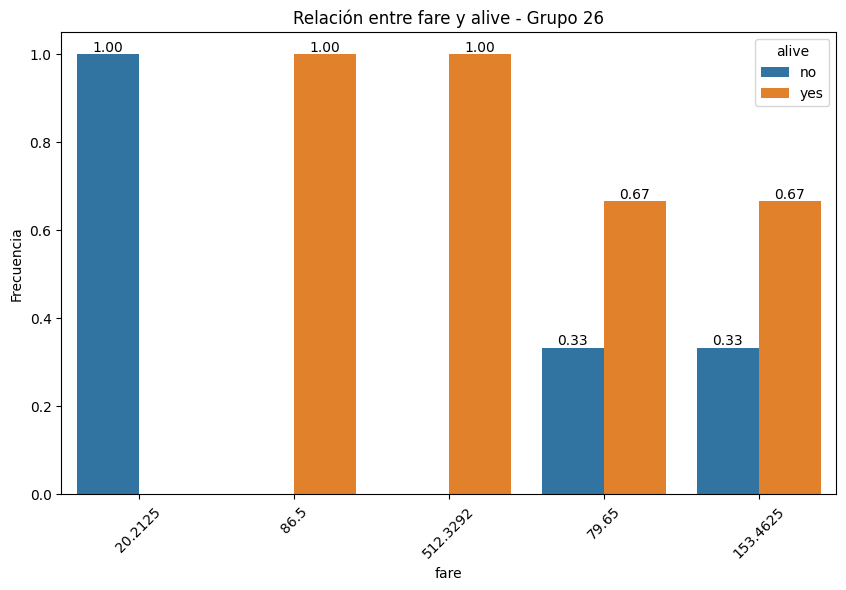

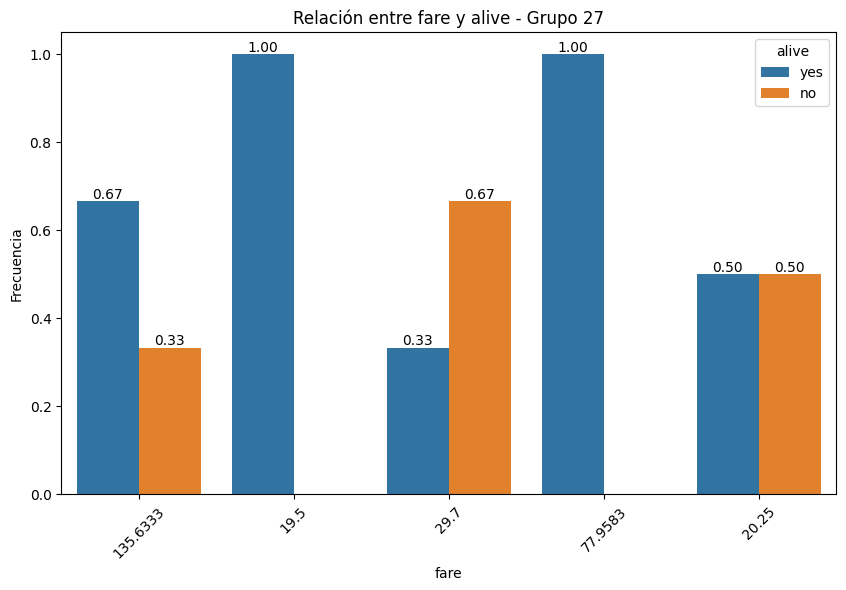

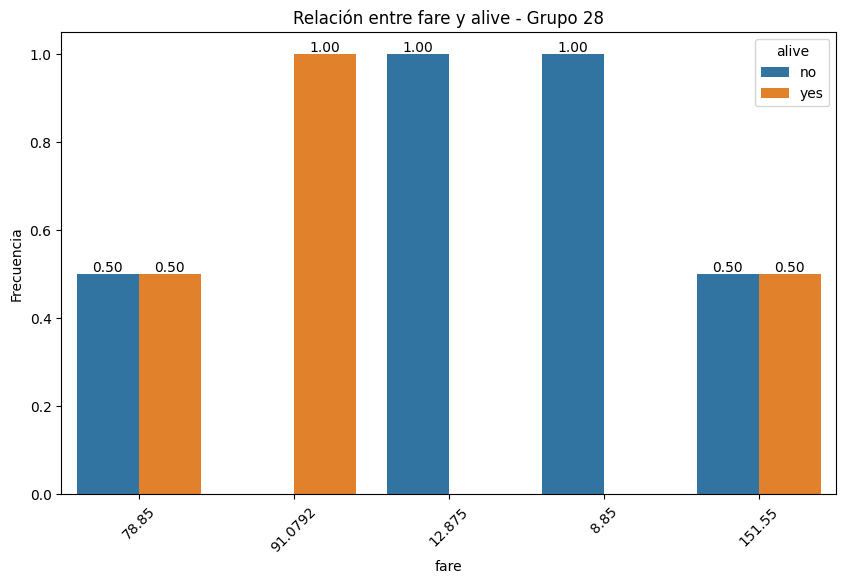

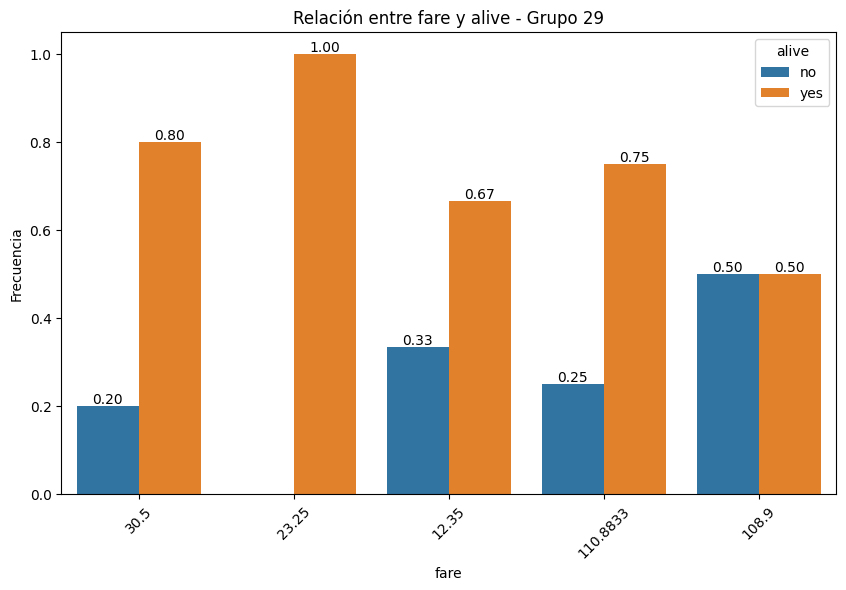

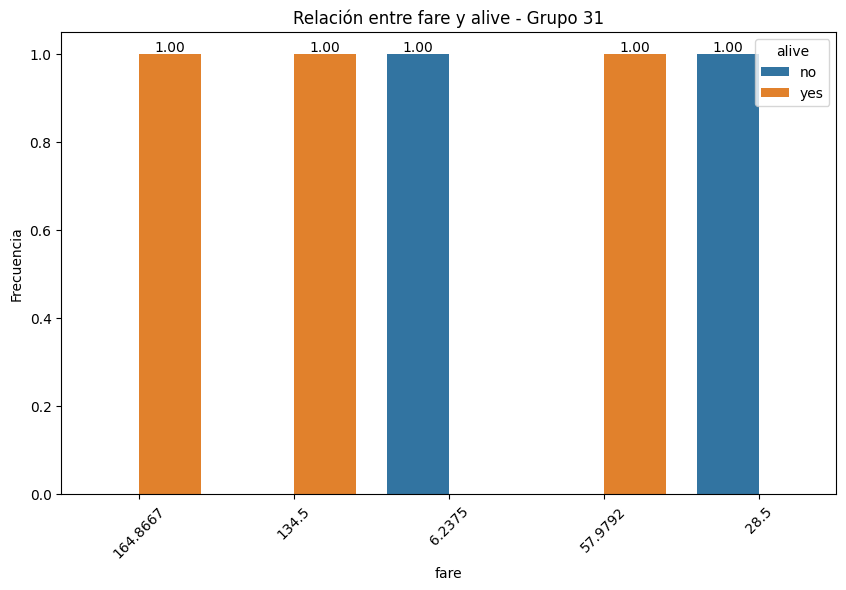

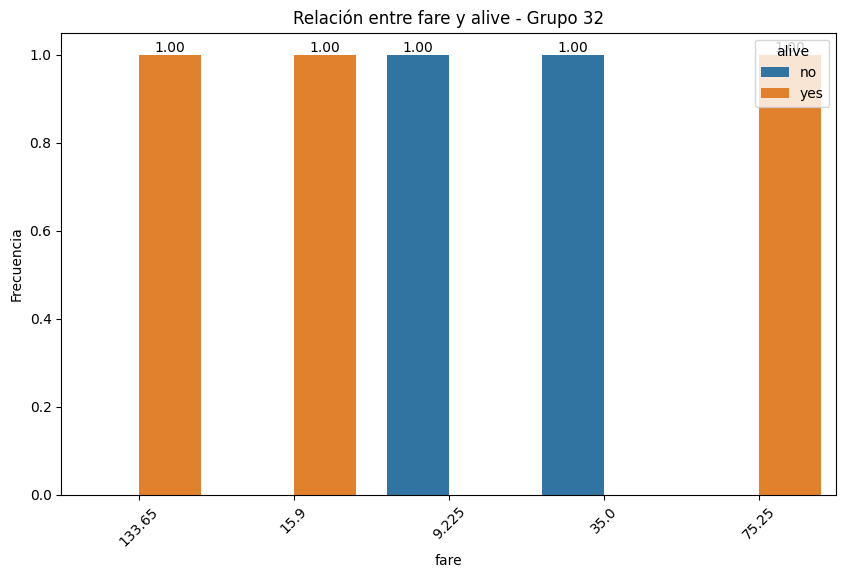

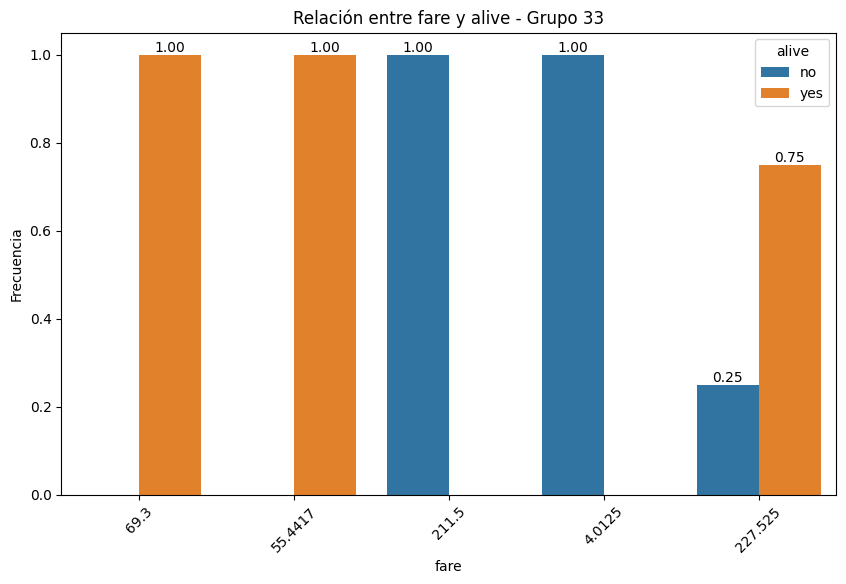

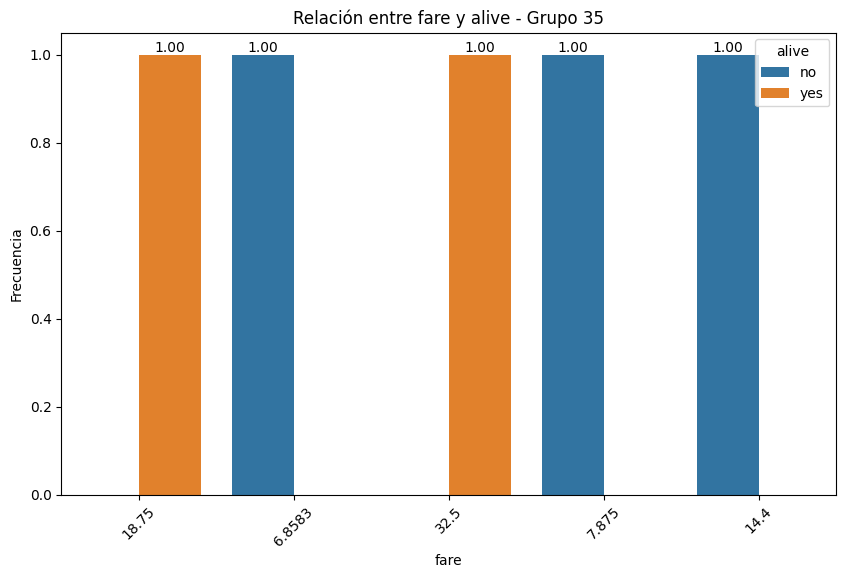

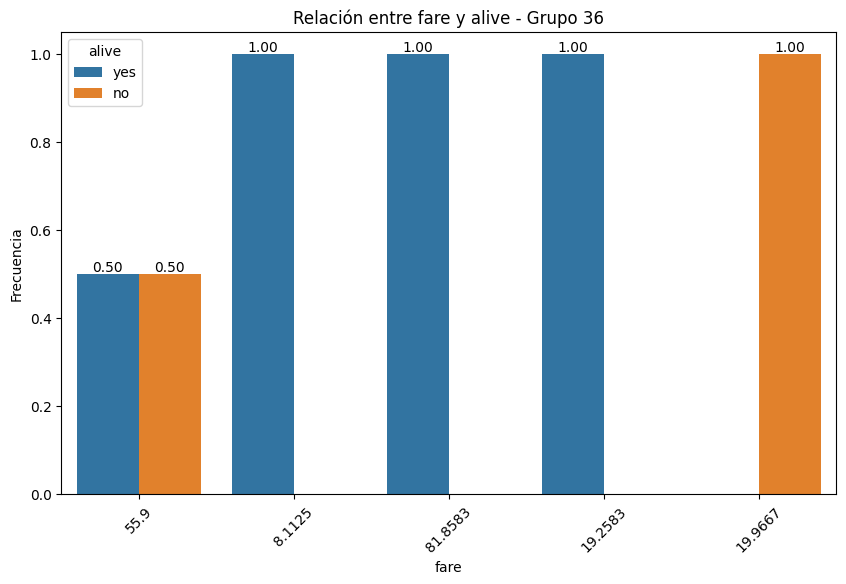

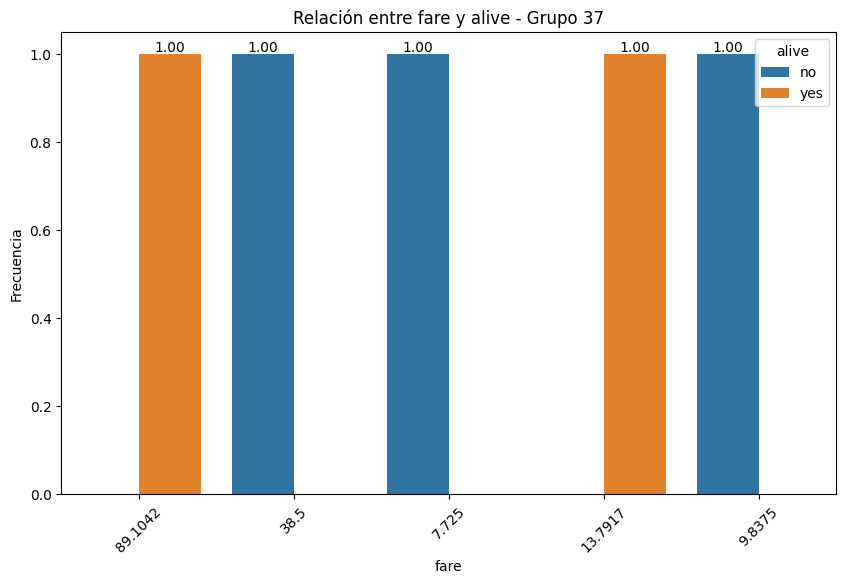

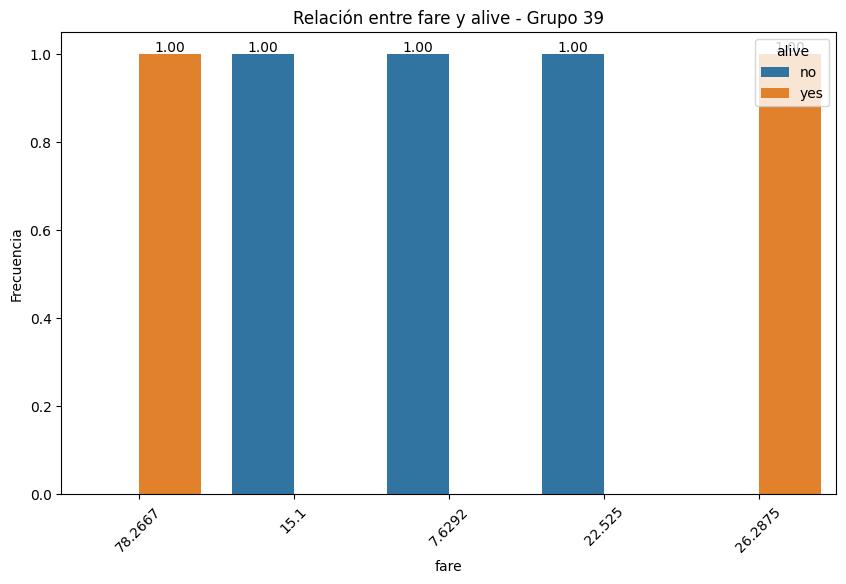

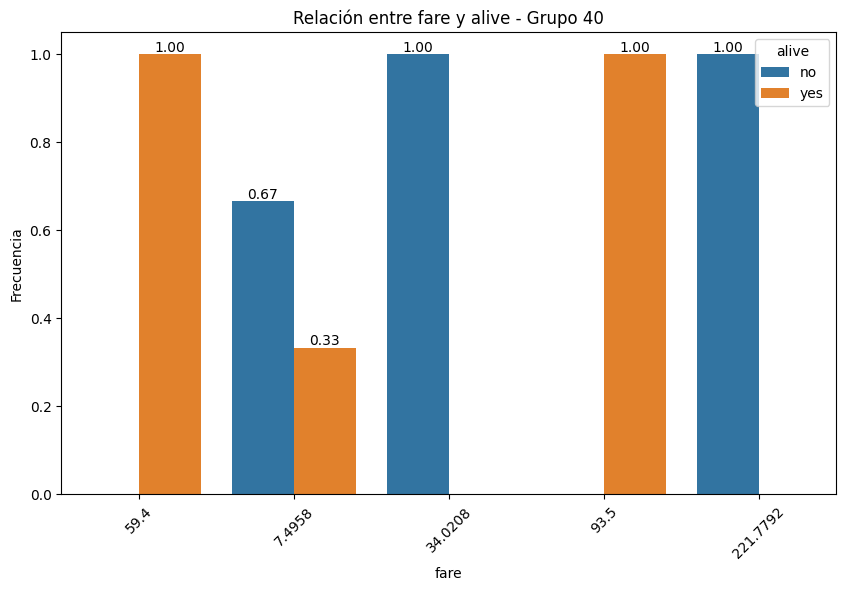

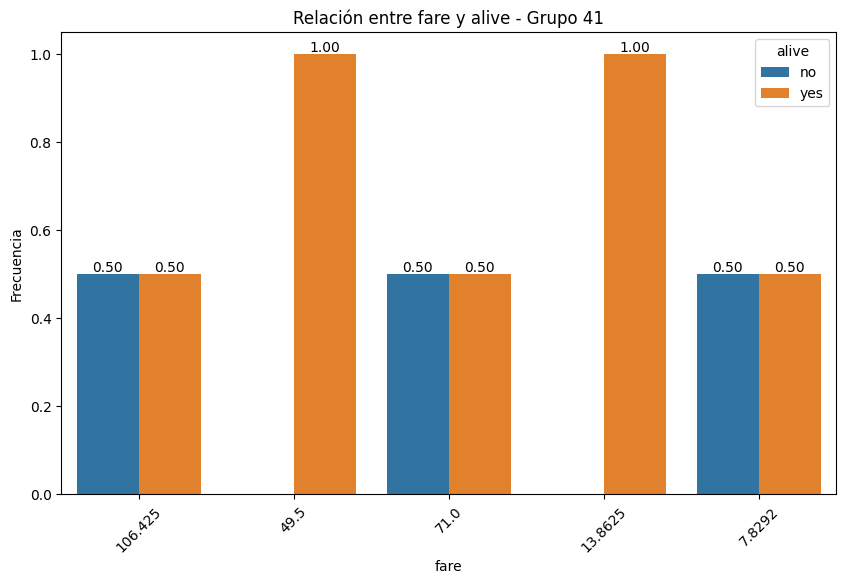

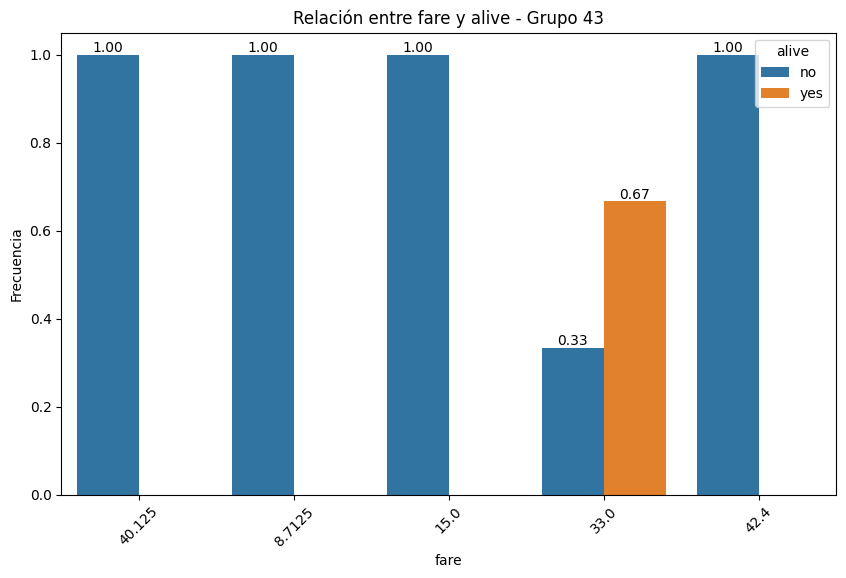

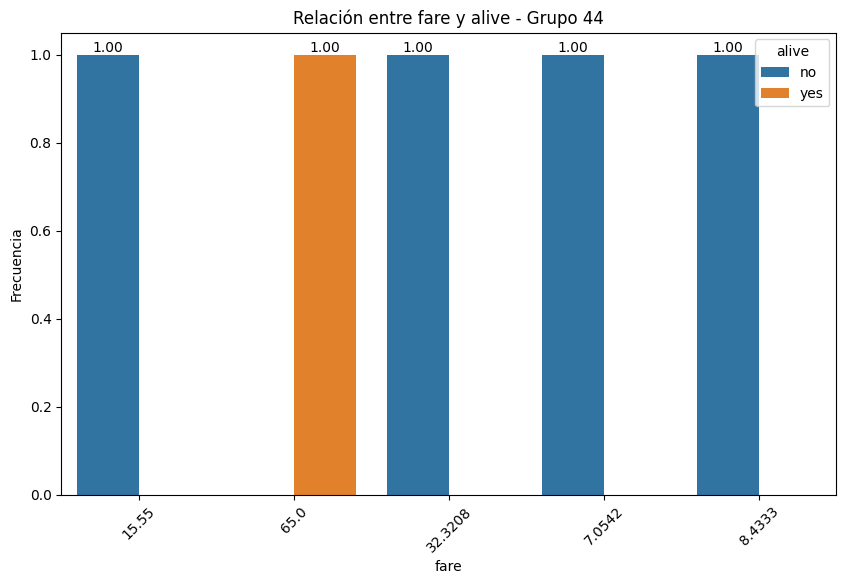

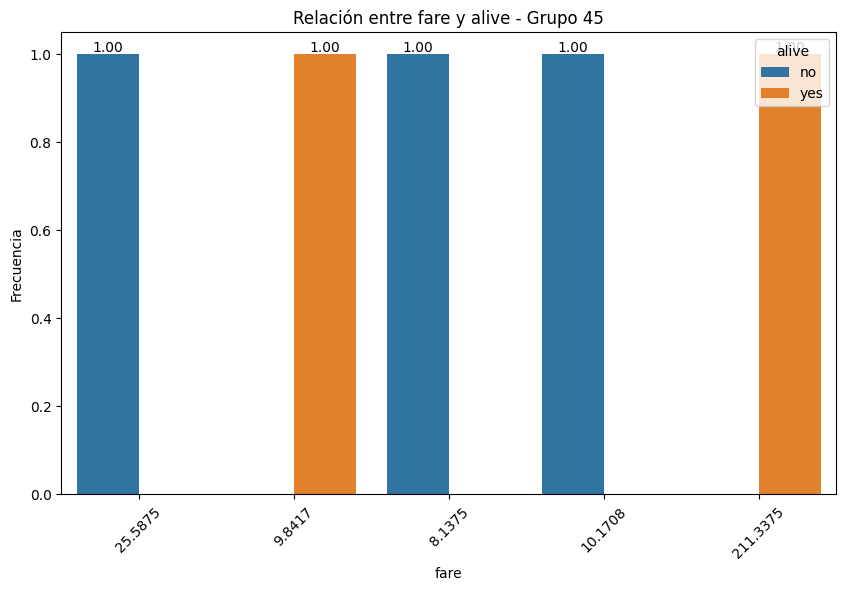

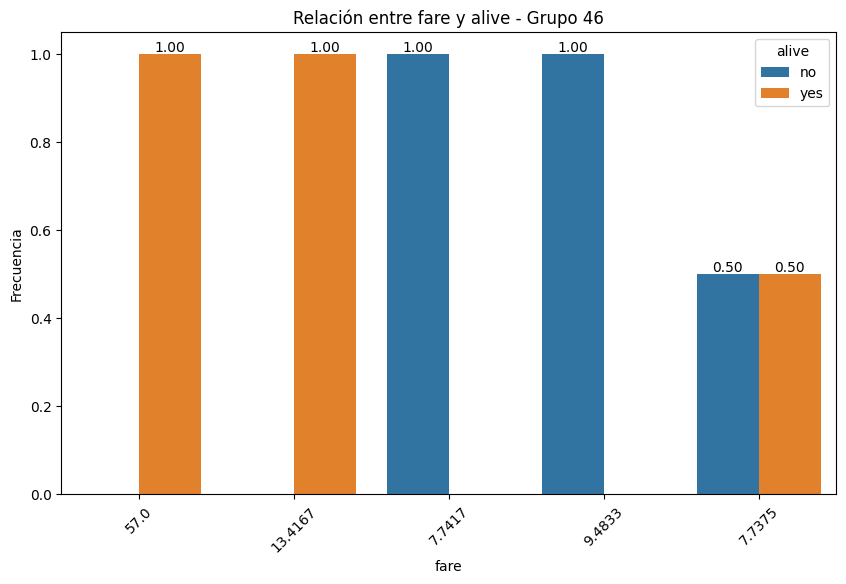

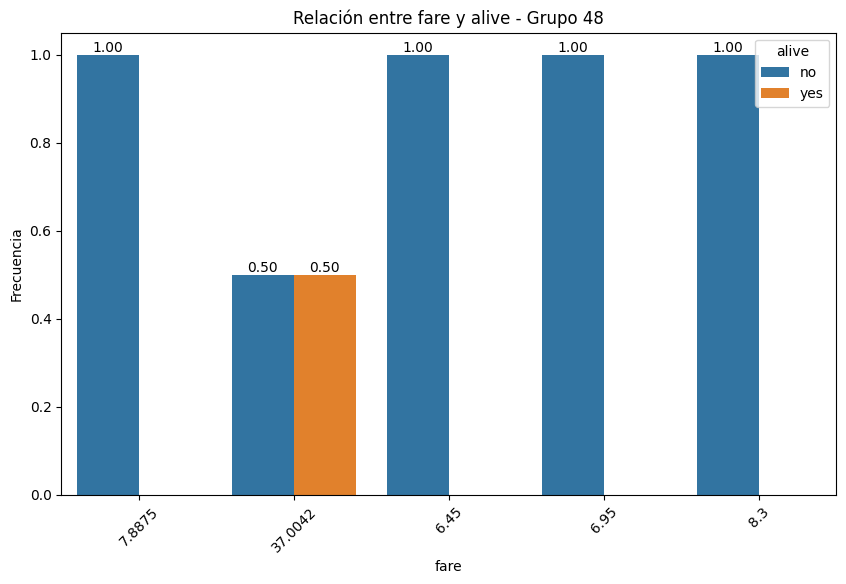

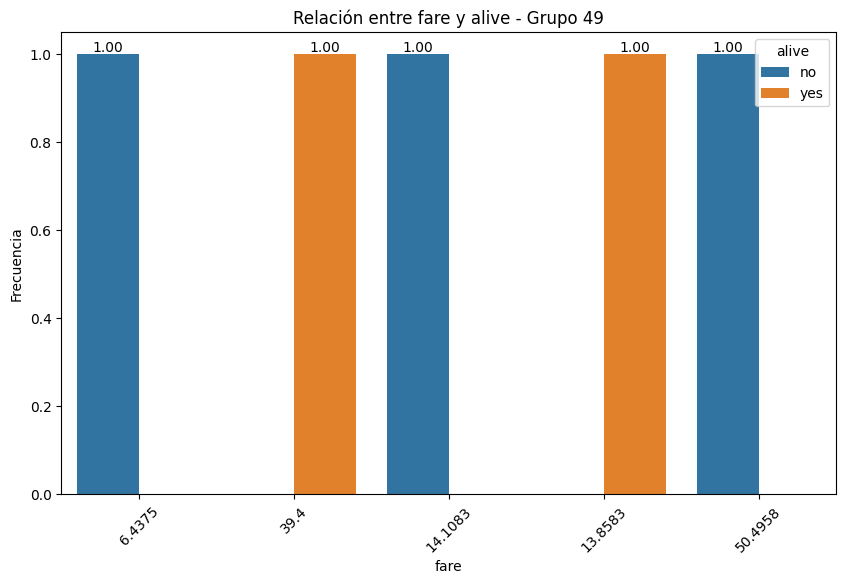

In [153]:
plot_categorical_relationship_fin(df_titanic, "fare","alive", relative_freq = True, show_values = True)

In [109]:
df_titanic.groupby('alive')['fare'].value_counts()

alive  fare    
no     8.0500      38
       7.8958      37
       13.0000     26
       7.7500      22
       26.0000     16
       10.5000     15
       0.0000      14
       7.7750      13
       8.6625      12
       7.2500      12
       7.2292      11
       7.9250      10
       7.8542      10
       7.2250       9
       31.2750      7
       26.5500      7
       24.1500      7
       16.1000      7
       7.0500       7
       69.5500      7
       9.5000       7
       14.4542      6
       39.6875      6
       27.9000      6
       46.9000      6
       73.5000      5
       29.1250      5
       14.5000      5
       15.5000      5
       11.5000      4
       27.7208      4
       52.0000      4
       7.1250       4
       21.0000      4
       34.3750      4
       21.0750      4
       25.4667      4
       7.7958       4
       18.0000      3
       7.6500       3
       14.4583      3
       13.5000      3
       7.5500       3
       151.5500     2
       79.2000  

In [110]:
df_titanic.groupby('alive')['fare'].sum().reset_index()

alive        fare
0    no  12142.7199
1   yes  16551.2294

In [111]:
df_titanic.groupby('class')['fare'].sum().reset_index()

class        fare
0   First  18177.4125
1  Second   3801.8417
2   Third   6714.6951

In [161]:
from scipy.stats import chi2_contingency


tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['fare'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 425.8083805791106
P-Value: 1.1647635739939964e-11
Grados de Libertad: 247
Tabla de Frecuencias Esperadas:
 [[ 9.24242424  0.61616162  0.61616162  0.61616162  0.61616162  0.61616162
   1.23232323  1.23232323  0.61616162  0.61616162  1.23232323  0.61616162
   4.31313131  1.23232323  2.46464646  0.61616162  7.39393939  9.24242424
   8.01010101  0.61616162  1.84848485  0.61616162  2.46464646  0.61616162
   2.46464646  0.61616162  0.61616162  2.46464646  1.23232323  0.61616162
  20.94949495  9.85858586  0.61616162  3.6969697   0.61616162  1.23232323
   8.01010101  0.61616162  2.46464646  0.61616162 23.41414141 11.09090909
   0.61616162 26.49494949  0.61616162  0.61616162  0.61616162  0.61616162
   0.61616162  0.61616162  0.61616162  0.61616162  0.61616162  0.61616162
   8.01010101  0.61616162  0.61616162  0.61616162  1.23232323  0.61616162
   1.23232323  1.23232323  0.61616162  0.61616162  5.54545455  1.23232323
   1.23232323  0.61616162  0.61616162  0.61616162  0.616161

In [112]:
df_titanic.fare.sum()

28693.9493

En total se vendieron entradas por un valor total de 28693.95 $, observandose en las graficas como en la ciudad de partida del titanic, es donde se vendieron los billetes mas caros respecto a las otras dos ciudades, que coincide con la que mayor numero de fallecidos  hubo, sin embargo el 42,31% de las ventas fueron realziadas por los fallecidos y el 57,68% por los supervivientes. No obstante, recordemos que la clase mas afectada, con mucha diferencia, por fallecimientos fue la tercera clase, la cual compró solamente un total del 23,4% de los billetes, frente al 76,63% restante que fe comprado por las clases primera(63,38%) y segunda(13.25%). finalmente tras la realizar el test de chi cuadrado a ambas variables , el PV es muy bajo por lo que, según el test hay una relación estadística significativas entre el precio del billete y el grado de supervivencia o fallecimiento.


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [113]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

In [114]:
df_titanic["fare"].nsmallest(16)

179    0.0000
263    0.0000
271    0.0000
277    0.0000
302    0.0000
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
674    0.0000
732    0.0000
806    0.0000
815    0.0000
822    0.0000
378    4.0125
Name: fare, dtype: float64

In [115]:
df_titanic["fare"].nlargest(15)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
380    227.5250
557    227.5250
700    227.5250
716    227.5250
Name: fare, dtype: float64

In [116]:
df_titanic.groupby('family_members')['fare'].sum().reset_index()

family_members        fare
0               0  11407.3238
1               1   8032.9547
2               2   4048.6332
3               3   1591.0708
4               4    871.4168
5               5   1621.9000
6               6    352.4000
7               7    281.4000
8              10    486.8500

In [117]:
df_titanic.groupby('age')['fare'].sum().reset_index()

age       fare
0    0.420000     8.5167
1    0.670000    14.5000
2    0.750000    38.5166
3    0.830000    47.7500
4    0.920000   151.5500
5    1.000000   210.0417
6    2.000000   375.3625
7    3.000000   154.6917
8    4.000000   295.4333
9    5.000000    90.8708
10   6.000000    76.7500
11   7.000000    95.0625
12   8.000000   113.2000
13   9.000000   223.5083
14  10.000000    52.0500
15  11.000000   216.9625
16  12.000000    11.2417
17  13.000000    26.7292
18  14.000000   255.7542
19  14.500000    14.4542
20  15.000000   248.2751
21  16.000000   437.6667
22  17.000000   369.0625
23  18.000000   989.6500
24  19.000000   696.7374
25  20.000000   129.3626
26  20.500000     7.2500
27  21.000000   757.5749
28  22.000000   688.6291
29  23.000000   569.9208
30  23.500000     7.2292
31  24.000000  1291.0707
32  24.500000     8.0500
33  25.000000   561.5626
34  26.000000   343.5625
35  27.000000   546.5041
36  28.000000   525.5040
37  28.500000    23.3292
38  29.000000   541.8165
39  29.699118  3922.0663
40  30.000000   638.5417
41  30.500000    15.8000
42  31.000000   629.1542
43  32.000000   437.8208
44  32.500000    43.0708
45  33.000000   387.3833
46  34.000000   249.5458
47  34.500000     6.4375
48  35.000000  1607.6250
49  36.000000  1319.2291
50  36.500000    26.0000
51  37.000000   178.8667
52  38.000000   690.2666
53  39.000000   513.2666
54  40.000000   482.4291
55  40.500000    22.2500
56  41.000000   235.1333
57  42.000000   482.6334
58  43.000000   298.9875
59  44.000000   267.8250
60  45.000000   441.8209
61  45.500000    35.7250
62  46.000000   166.3750
63  47.000000   248.4125
64  48.000000   341.0376
65  49.000000   359.5751
66  50.000000   640.2583
67  51.000000   201.2667
68  52.000000   308.4167
69  53.000000    51.4792
70  54.000000   355.8167
71  55.000000    46.5000
72  55.500000     8.0500
73  56.000000   175.9041
74  57.000000    22.8500
75  58.000000   469.5083
76  59.000000    20.7500
77  60.000000   220.0000
78  61.000000    72.0583
79  62.000000   143.6000
80  63.000000    87.5458
81  64.000000   289.0000
82  65.000000    96.2792
83  66.000000    10.5000
84  70.000000    81.5000
85  70.500000     7.7500
86  71.000000    84.1584
87  74.000000     7.7750
88  80.000000    30.0000

In [118]:
# Encontrar los 15 valores más bajos 
pago_0= df_titanic.nsmallest(15, 'fare')# devuelve un DF con los valores mas bajos respecto a la columna fare

pago_0

sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
732  male  29.699118   0.0  Second  man        True  Southampton    no   True   
806  male  39.000000   0.0   First  man        True  Southampton    no   True   
815  male  29.699118   0.0   First  man        True  Southampton    no   True   
822  male  38.000000   0.0   First  man        True  Southampton    no   True   

     family_members  
179               0  
263               0  
271               0  
277               0  
302               0  
413               0  
466               0  
481               0  
597               0  
633               0  
674               0  
732               0  
806               0  
815               0  
822               0

In [119]:
# el que mas pago
mas_pago= df_titanic.nlargest(15, 'fare')# devuelve un DF con los valores mas altos respecto a la columna fare

mas_pago

sex        age      fare  class    who  adult_male  embark_town alive  \
258  female  35.000000  512.3292  First  woman       False    Cherbourg   yes   
679    male  36.000000  512.3292  First    man        True    Cherbourg   yes   
737    male  35.000000  512.3292  First    man        True    Cherbourg   yes   
27     male  19.000000  263.0000  First    man        True  Southampton    no   
88   female  23.000000  263.0000  First  woman       False  Southampton   yes   
341  female  24.000000  263.0000  First  woman       False  Southampton   yes   
438    male  64.000000  263.0000  First    man        True  Southampton    no   
311  female  18.000000  262.3750  First  woman       False    Cherbourg   yes   
742  female  21.000000  262.3750  First  woman       False    Cherbourg   yes   
118    male  24.000000  247.5208  First    man        True    Cherbourg    no   
299  female  50.000000  247.5208  First  woman       False    Cherbourg   yes   
380  female  42.000000  227.5250  First  woman       False    Cherbourg   yes   
557    male  29.699118  227.5250  First    man        True    Cherbourg    no   
700  female  18.000000  227.5250  First  woman       False    Cherbourg   yes   
716  female  38.000000  227.5250  First  woman       False    Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0  
27   False               5  
88   False               5  
341  False               5  
438  False               5  
311  False               4  
742  False               4  
118  False               1  
299  False               1  
380   True               0  
557   True               0  
700  False               1  
716   True               0

En definitiva, exsitieron 15 perosnas que no pagaron, siendo 5 de primera clase, 4 de tercera clase y 6 de segunda clase,  falleciendo todos menos uno que si sobrevivio de tercera clase, con edads comnprendidas entre 18 y 64 años, iban solos y sin familia, embarcando en la ciudad de partida del Titanic, teniendo todos los indicios de haber sido polizones que se colaron en el barco. <br>
Hubo 3 personas que pagaron el maximo pasaje: 512.3292, embarcaron en Cherbourg, viajaban en primera clase, un hombre y una mujer sin compañia, y 1 hombre con 1 miembro familiar, los cuales finalmente sobreviveron al desastre.



6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [120]:
df_titanic["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [121]:
# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


df_titanic.groupby('alive')[['fare','embark_town']].sum().reset_index()

alive        fare  \
0    no  12142.7199   
1   yes  16551.2294   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [122]:
texto_fallecidos="SouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstown"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_fallecidos.lower()
# Contar la cantidad de veces que aprece Southampton
repeticiones1 = texto_plano.count("southampton")
repeticiones2 = texto_plano.count("cherbourg")
repeticiones3 = texto_plano.count("queenstown")

print(f"El numero de fallecidos que embarcaron en la ciudad de southampton es {repeticiones1}")
print(f"El numero de fallecidos que embarcaron en la ciudad de cherbourg es {repeticiones2}")
print(f"El numero de fallecidos que embarcaron en la ciudad de queenstown es {repeticiones3}")




El numero de fallecidos que embarcaron en la ciudad de southampton es 427
El numero de fallecidos que embarcaron en la ciudad de cherbourg es 75
El numero de fallecidos que embarcaron en la ciudad de queenstown es 47


In [123]:
texto_vivos="CherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonQueenstownCherbourgQueenstownCherbourgCherbourgCherbourgQueenstownQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonCherbourgQueenstownCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgQueenstownQueenstownQueenstownSouthamptonCherbourgCherbourgCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonCherbourgSouthamptonSouthamptonCherbourgQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownQueenstownCherbourgCherbourgQueenstownCherbourgCherbourgCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonCherbourg"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_vivos.lower()
# Contar la cantidad de veces que aprece Southampton
repeticiones4 = texto_plano.count("southampton")
repeticiones5 = texto_plano.count("cherbourg")
repeticiones6 = texto_plano.count("queenstown")

print(f"El numero de supervivientes que embarcaron en la ciudad de southampton es {repeticiones4}")
print(f"El numero de supervivientes que embarcaron en la ciudad de cherbourg es {repeticiones5}")
print(f"El numero de supervivientes que embarcaron en la ciudad de queenstown es {repeticiones6}")

El numero de supervivientes que embarcaron en la ciudad de southampton es 217
El numero de supervivientes que embarcaron en la ciudad de cherbourg es 93
El numero de supervivientes que embarcaron en la ciudad de queenstown es 30


La ciudad donde hubo mas cantidad de fallecidos y supervientes fue desde la ciudad origen del Titanic, donde embarcaron el mayor numero de viajeros. Anteriormente ya estableci que no habia una estadio estadistico significativo entre el precio del billete y la supervivencia o fallecimiento. Ahora al cruzar datos ademas con las ciudades, continua ese mismo resultado, ya que no aporta nada nuevo la ciudad de embarque, a loque ya tenemos expuesto.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [124]:
columnas_edad = ["class","age"]
#hallamos la frecuencia  absoluta
for catego in columnas_edad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para age
age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       

In [125]:
#hallamos la frecuencia  relativa
for catego in columnas_edad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



para age
age
29.699118    19.865320
24.000000     3.367003
22.000000     3.030303
18.000000     2.918070
28.000000     2.805836
30.000000     2.805836
19.000000     2.805836
21.000000     2.693603
25.000000     2.581369
36.000000     2.469136
29.000000     2.244669
35.000000     2.020202
32.000000     2.020202
26.000000     2.020202
27.000000     2.020202
31.000000     1.907969
16.000000     1.907969
34.000000     1.683502
20.000000     1.683502
23.000000     1.683502
33.000000     1.683502
39.000000     1.571268
40.000000     1.459035
17.000000     1.459035
42.000000     1.459035
45.000000     1.346801
38.000000     1.234568
4.000000      1.122334
2.000000      1.122334
50.000000     1.122334
44.000000     1.010101
47.000000     1.010101
48.000000     1.010101
54.000000     0.897868
9.000000      0.897868
1.000000      0.785634
51.000000     0.785634
37.000000     0.673401
52.00

In [126]:
df_titanic.groupby('alive')[['age','class']].sum().reset_index()

alive           age  \
0    no  16697.889706   
1   yes   9764.024118   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        class  
0  ThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdFirstThirdFirstSecondFirstFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdFirstThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstSecondThirdThirdFirstThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdSecondFirstThirdThirdThirdThirdThirdSecondSecondFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondSecondThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdFirstThirdThirdFirstSecondThirdThirdSecondThirdFirstThirdThirdSecondThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdSecondSecondSecondThirdThirdThirdThirdSecondThirdThirdSecondSecondThirdSecondSecondSecondThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdSecondThirdThirdThirdThirdFirstThirdThirdSecondThirdThirdFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondThirdThirdThirdThirdFirstFirstThirdThirdF

In [127]:
texto_muertos="ThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdFirstThirdFirstSecondFirstFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdFirstThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstSecondThirdThirdFirstThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdSecondFirstThirdThirdThirdThirdThirdSecondSecondFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondSecondThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdFirstThirdThirdFirstSecondThirdThirdSecondThirdFirstThirdThirdSecondThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdSecondSecondSecondThirdThirdThirdThirdSecondThirdThirdSecondSecondThirdSecondSecondSecondThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdSecondThirdThirdThirdThirdFirstThirdThirdSecondThirdThirdFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondThirdThirdThirdThirdFirstFirstThirdThirdFirstFirstSecondSecondSecondThirdThirdFirstThirdThirdThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondSecondThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstSecondThirdThirdSecondThirdFirstThirdFirstThirdThirdFirstSecondThirdThirdSecondFirstThirdThirdThirdThirdFirstSecondThirdThirdThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdFirstThirdSecondThirdThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdThirdFirstSecondThirdThirdThirdFirstThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdSecondFirstThirdFirstThirdSecondSecondThirdThirdFirstSecondSecondThirdThirdThirdThirdThirdThirdSecondSecondThirdThirdThirdThirdFirstSecondThirdFirstThirdThirdThirdThirdSecondFirstThirdSecondThirdThirdThirdThirdSecondSecondThirdSecondThirdThirdSecondSecondSecondThirdThirdThirdThirdFirstThirdFirstThirdFirstThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdFirstThirdSecondThirdFirstThirdSecondThirdThirdSecondThirdFirstThirdSecondThirdThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdThirdSecondThirdThirdSecondThirdSecondFirstThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdSecondThirdThird"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_muertos.lower()
# Contar la cantidad de veces que aprece Southampton
r1 = texto_plano.count("first")
r2 = texto_plano.count("second")
r3 = texto_plano.count("third")

print(f"El numero de fallecidos de primera clase es {r1}")
print(f"El numero de fallecidos de segunda clase es {r2}")
print(f"El numero de fallecidos de tercera clase es {r3}")

El numero de fallecidos de primera clase es 80
El numero de fallecidos de segunda clase es 97
El numero de fallecidos de tercera clase es 372


In [128]:
texto_supervivientes="FirstThirdFirstThirdSecondThirdFirstSecondSecondThirdSecondThirdFirstThirdThirdFirstThirdThirdThirdSecondThirdThirdFirstSecondFirstSecondSecondFirstThirdSecondThirdThirdSecondThirdThirdThirdSecondThirdFirstFirstSecondThirdThirdThirdSecondThirdThirdThirdSecondFirstThirdThirdThirdFirstThirdSecondThirdFirstThirdSecondThirdThirdFirstSecondThirdSecondFirstFirstThirdThirdThirdThirdFirstSecondFirstThirdFirstThirdFirstSecondFirstThirdSecondThirdSecondFirstThirdFirstFirstFirstSecondThirdThirdFirstFirstThirdSecondThirdFirstThirdThirdThirdSecondThirdFirstFirstFirstFirstThirdThirdSecondFirstFirstFirstFirstFirstFirstThirdSecondFirstFirstSecondSecondFirstSecondThirdFirstThirdFirstFirstThirdSecondFirstSecondSecondThirdThirdFirstThirdThirdFirstThirdThirdFirstFirstFirstThirdFirstThirdFirstSecondSecondFirstThirdFirstThirdSecondThirdSecondFirstThirdSecondSecondSecondSecondThirdFirstThirdSecondFirstSecondSecondSecondThirdFirstSecondFirstThirdFirstFirstThirdFirstSecondFirstThirdSecondSecondThirdThirdFirstFirstThirdFirstFirstSecondFirstThirdThirdFirstFirstSecondSecondFirstFirstSecondSecondThirdSecondFirstFirstFirstSecondSecondSecondSecondFirstThirdThirdFirstFirstThirdThirdSecondFirstFirstThirdSecondFirstThirdSecondFirstFirstFirstFirstSecondFirstSecondFirstFirstSecondFirstThirdSecondSecondFirstThirdFirstFirstFirstSecondFirstThirdThirdFirstFirstThirdSecondThirdFirstThirdFirstSecondSecondThirdFirstFirstFirstFirstThirdThirdThirdFirstFirstSecondFirstFirstThirdFirstFirstFirstSecondSecondFirstSecondThirdFirstFirstFirstFirstThirdSecondSecondThirdSecondSecondFirstThirdFirstFirstSecondThirdFirstThirdFirstThirdThirdFirstThirdSecondFirstThirdThirdFirstFirstThirdThirdSecondThirdFirstThirdSecondFirstThirdFirstFirstFirstFirstThirdFirstFirstThirdFirstSecondSecondThirdFirstSecondThirdFirstSecondFirstFirst"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_supervivientes.lower()
# Contar la cantidad de veces que aprece Southampton
r4 = texto_plano.count("first")
r5 = texto_plano.count("second")
r6 = texto_plano.count("third")

print(f"El numero de supervivientes de primera clase es {r4}")
print(f"El numero de supervivientes de segunda clase es {r5}")
print(f"El numero de supervivientes de tercera clase es {r6}")

El numero de supervivientes de primera clase es 136
El numero de supervivientes de segunda clase es 87
El numero de supervivientes de tercera clase es 119


In [162]:
tabla_contingencia = pd.crosstab(df_titanic['age'], df_titanic['class'])# PV muy alto, no hay relacion estadistica significativa
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 345.2756527910772
P-Value: 4.2748511455583603e-13
Grados de Libertad: 176
Tabla de Frecuencias Esperadas:
 [[ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.24242424  0.20650954  0.55106622]
 [ 1.6969697   1.44556678  3.85746352]
 [ 2.42424242  2.0650954   5.51066218]
 [ 1.45454545  1.23905724  3.30639731]
 [ 2.42424242  2.0650954   5.51066218]
 [ 0.96969697  0.82603816  2.20426487]
 [ 0.72727273  0.61952862  1.65319865]
 [ 0.72727273  0.61952862  1.65319865]
 [ 0.96969697  0.82603816  2.20426487]
 [ 1.93939394  1.65207632  4.40852974]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.96969697  0.82603816  2.20426487]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.48484848  0.41301908  1.10213244]
 [ 1.45454545  1.23905724  3.30639731]
 [ 0.24242424  0.20650954  0.55106622]
 [ 1.21212121  1.0325477   2.75533109]
 [ 4.12121212  3.51066218  9.3681257 ]
 [ 3.15151515  

En relacion a estas dos variables (edad y clase): <br>
1. El mayor numero de fallecidos por edad y clase es para los de la tercera clase con un total de 372 muertos, siendo los falleciemiento entre la primera y segunda clase muy proximos.<br>
2. El mayor numero de supervivientes por edad y clase es para los de la primera clase con 136 finados, estando muy proximos los de segunda clase y en ultimo lugar estan los de tercera clase con 87 fallecidos.<br>
CONCLUSION.- La tercera clase es la mas desfavorecida en terminos generales en ambos casos.













8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

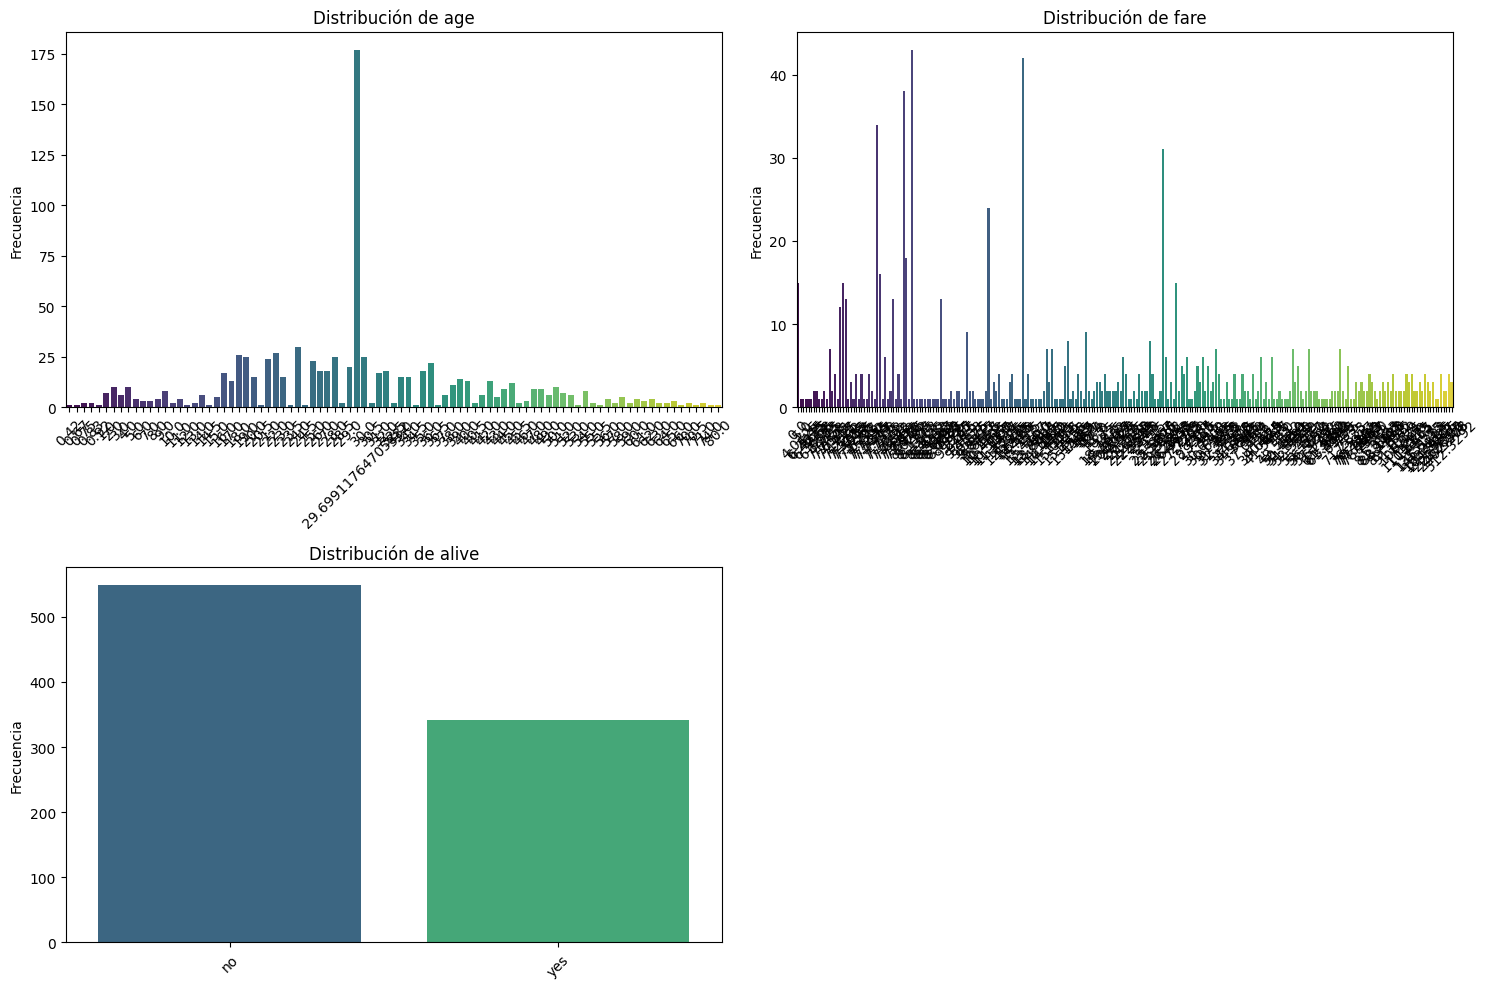

In [129]:
columnas_fin=["age","fare","alive"]
pinta_distribucion_categoricas(df_titanic, columnas_fin)

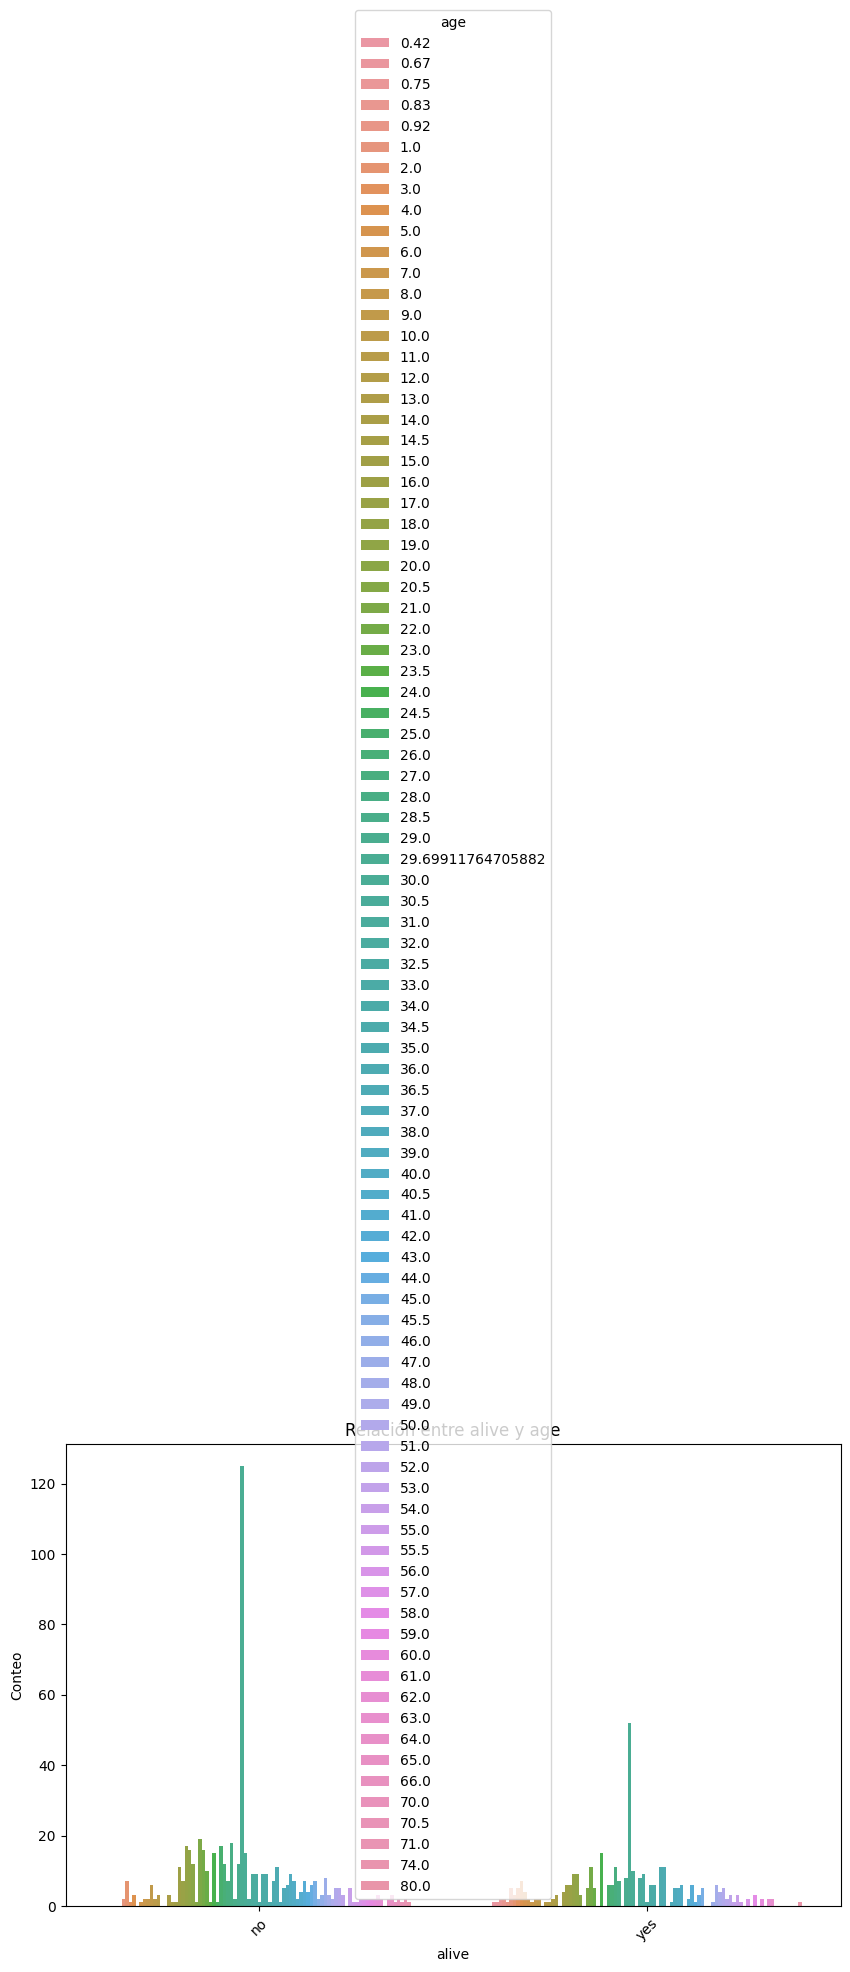

In [130]:
plot_categorical_relationship_fin(df_titanic,"alive","age",relative_freq=False, show_values=False, size_group = 5)

In [131]:
plot_combined_graphs(df_titanic, columnas_fin, whisker_width=4.5, bins = None)

(3, 2)


In [132]:
correlacion = df_titanic[["age","fare"]].corr()


correlacion

age      fare
age   1.000000  0.091566
fare  0.091566  1.000000

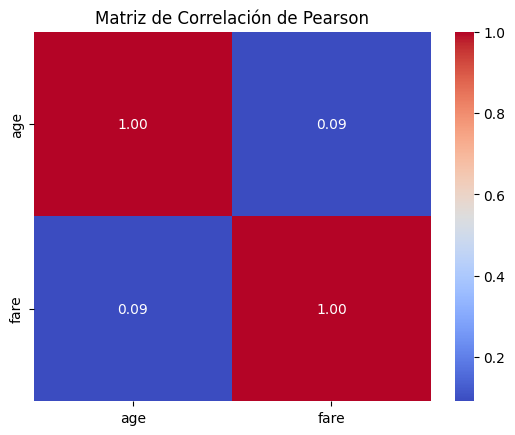

In [133]:
# Seleccionar las columnas de interés para la correlación
columnas_interes = ["age","fare"]
correlacion = df_titanic[columnas_interes].corr()# Calcular la matriz de correlación usando la funcion de pandas, corr() que permite 
#calcular la correlación entre las variables numéricas de un DataFrame

# Crear un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")#  annot, agrega los valores de correlaciónen cada celda del mapa de calor
# cmap establce la paleta de colores q usara y fmt=".2f, que solo se mostraran 2 decimales
plt.title('Matriz de Correlación de Pearson')
plt.show() # muestra

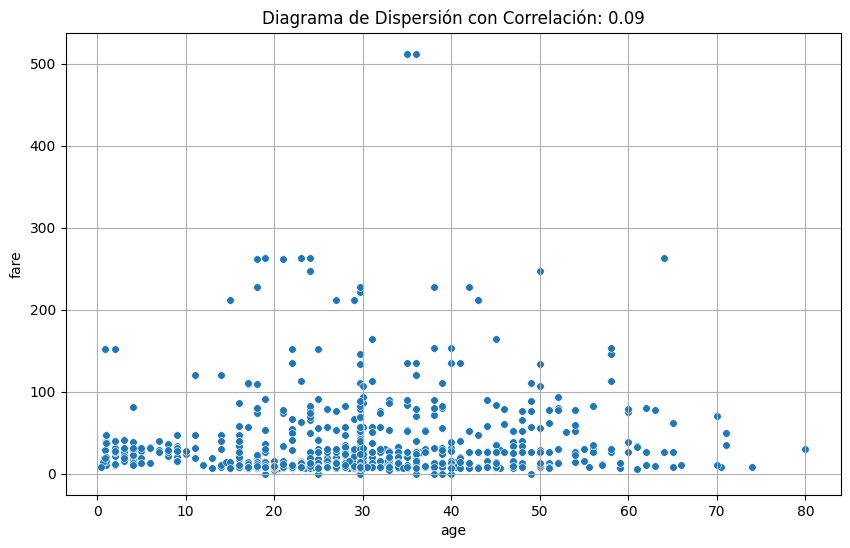

In [134]:
grafico_dispersion_con_correlacion(df_titanic,"age", "fare", mostrar_correlacion= True, tamano_puntos= 30)

(2,)


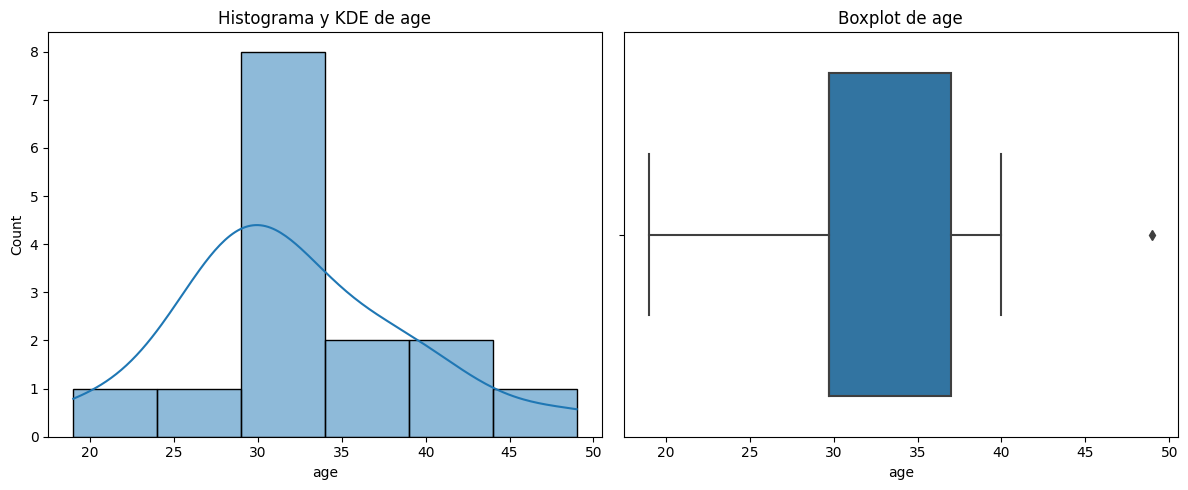

In [150]:
plot_combined_graphs(df_titanic.loc[df_titanic.fare == 0], ["age"])

In [135]:

df_titanic.groupby('age')['fare'].sum().reset_index()

age       fare
0    0.420000     8.5167
1    0.670000    14.5000
2    0.750000    38.5166
3    0.830000    47.7500
4    0.920000   151.5500
5    1.000000   210.0417
6    2.000000   375.3625
7    3.000000   154.6917
8    4.000000   295.4333
9    5.000000    90.8708
10   6.000000    76.7500
11   7.000000    95.0625
12   8.000000   113.2000
13   9.000000   223.5083
14  10.000000    52.0500
15  11.000000   216.9625
16  12.000000    11.2417
17  13.000000    26.7292
18  14.000000   255.7542
19  14.500000    14.4542
20  15.000000   248.2751
21  16.000000   437.6667
22  17.000000   369.0625
23  18.000000   989.6500
24  19.000000   696.7374
25  20.000000   129.3626
26  20.500000     7.2500
27  21.000000   757.5749
28  22.000000   688.6291
29  23.000000   569.9208
30  23.500000     7.2292
31  24.000000  1291.0707
32  24.500000     8.0500
33  25.000000   561.5626
34  26.000000   343.5625
35  27.000000   546.5041
36  28.000000   525.5040
37  28.500000    23.3292
38  29.000000   541.8165
39  29.699118  3922.0663
40  30.000000   638.5417
41  30.500000    15.8000
42  31.000000   629.1542
43  32.000000   437.8208
44  32.500000    43.0708
45  33.000000   387.3833
46  34.000000   249.5458
47  34.500000     6.4375
48  35.000000  1607.6250
49  36.000000  1319.2291
50  36.500000    26.0000
51  37.000000   178.8667
52  38.000000   690.2666
53  39.000000   513.2666
54  40.000000   482.4291
55  40.500000    22.2500
56  41.000000   235.1333
57  42.000000   482.6334
58  43.000000   298.9875
59  44.000000   267.8250
60  45.000000   441.8209
61  45.500000    35.7250
62  46.000000   166.3750
63  47.000000   248.4125
64  48.000000   341.0376
65  49.000000   359.5751
66  50.000000   640.2583
67  51.000000   201.2667
68  52.000000   308.4167
69  53.000000    51.4792
70  54.000000   355.8167
71  55.000000    46.5000
72  55.500000     8.0500
73  56.000000   175.9041
74  57.000000    22.8500
75  58.000000   469.5083
76  59.000000    20.7500
77  60.000000   220.0000
78  61.000000    72.0583
79  62.000000   143.6000
80  63.000000    87.5458
81  64.000000   289.0000
82  65.000000    96.2792
83  66.000000    10.5000
84  70.000000    81.5000
85  70.500000     7.7500
86  71.000000    84.1584
87  74.000000     7.7750
88  80.000000    30.0000

In [136]:
df_titanic.groupby('age')['alive'].unique()

age
0.420000         [yes]
0.670000         [yes]
0.750000         [yes]
0.830000         [yes]
0.920000         [yes]
1.000000     [no, yes]
2.000000     [no, yes]
3.000000     [yes, no]
4.000000     [yes, no]
5.000000         [yes]
6.000000     [yes, no]
7.000000     [no, yes]
8.000000     [no, yes]
9.000000     [no, yes]
10.000000         [no]
11.000000    [no, yes]
12.000000        [yes]
13.000000        [yes]
14.000000    [yes, no]
14.500000         [no]
15.000000    [yes, no]
16.000000    [no, yes]
17.000000    [yes, no]
18.000000    [no, yes]
19.000000    [no, yes]
20.000000    [no, yes]
20.500000         [no]
21.000000    [no, yes]
22.000000    [no, yes]
23.000000    [yes, no]
23.500000         [no]
24.000000    [no, yes]
24.500000         [no]
25.000000    [no, yes]
26.000000    [yes, no]
27.000000    [yes, no]
28.000000    [yes, no]
28.500000         [no]
29.000000    [yes, no]
29.699118    [no, yes]
30.000000    [yes, no]
30.500000         [no]
31.000000    [no, yes]
32.0000

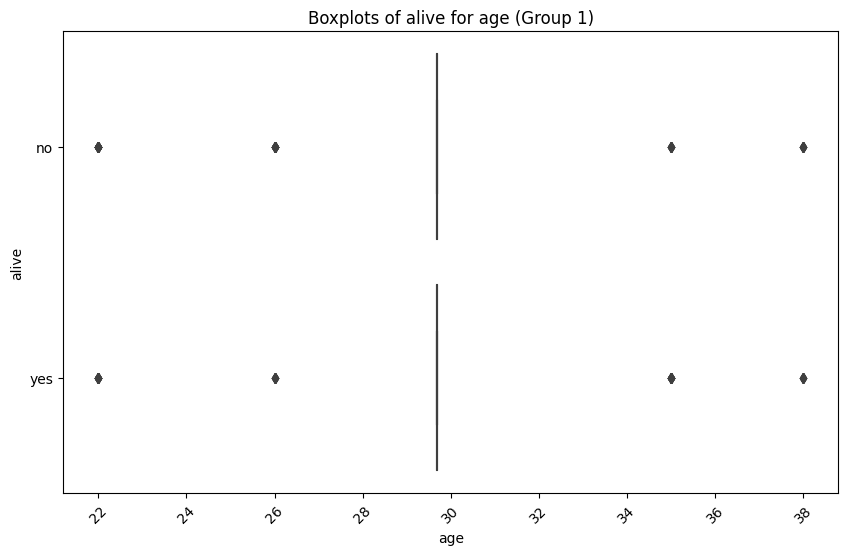

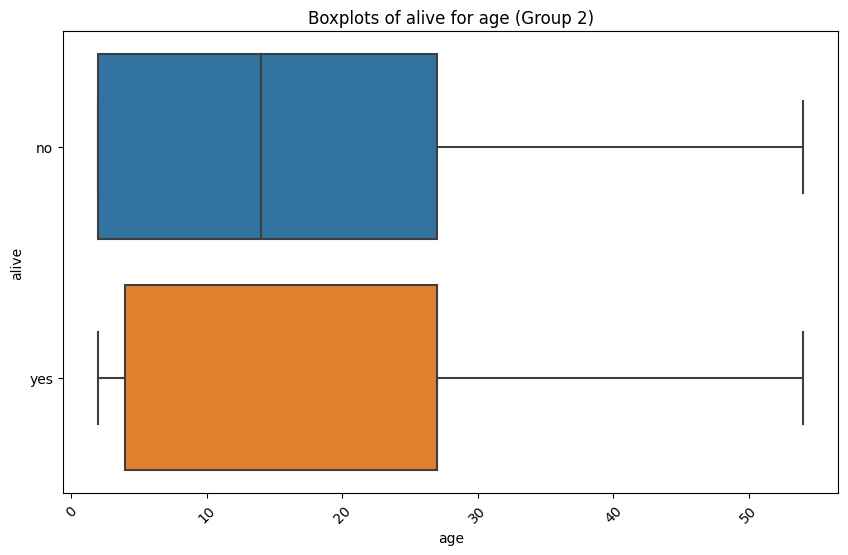

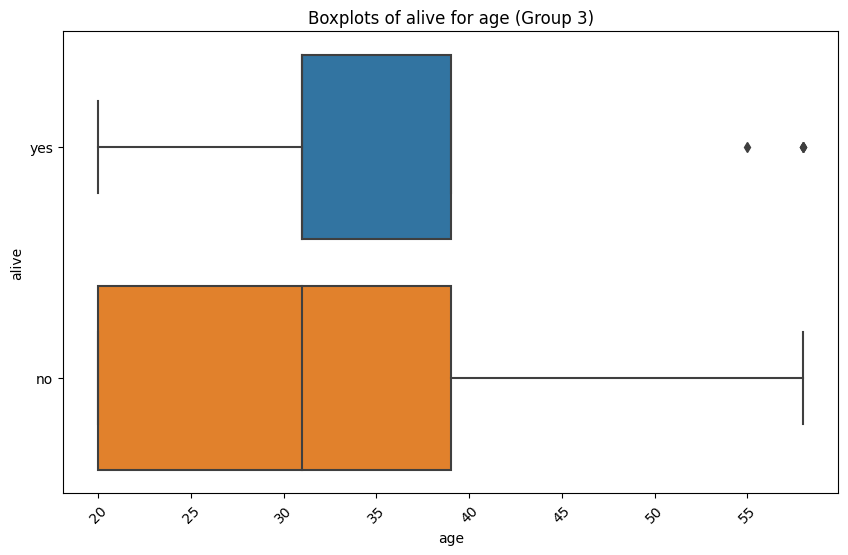

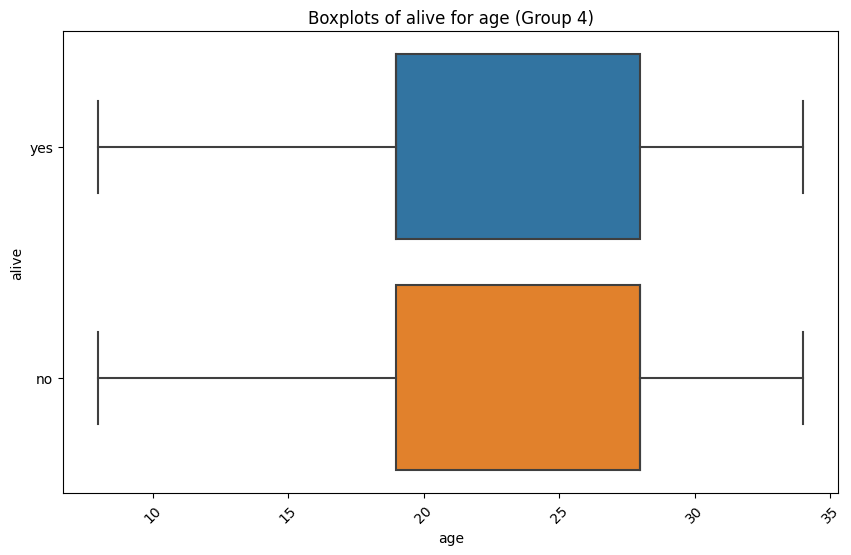

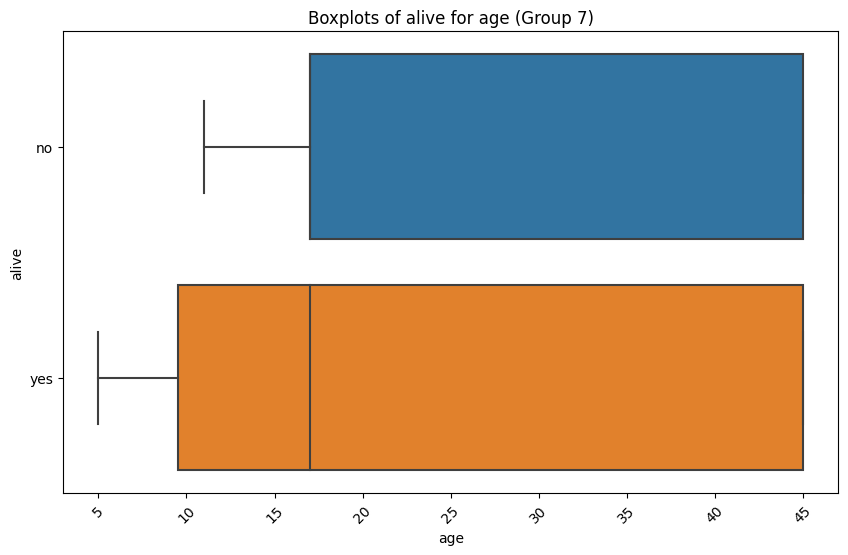

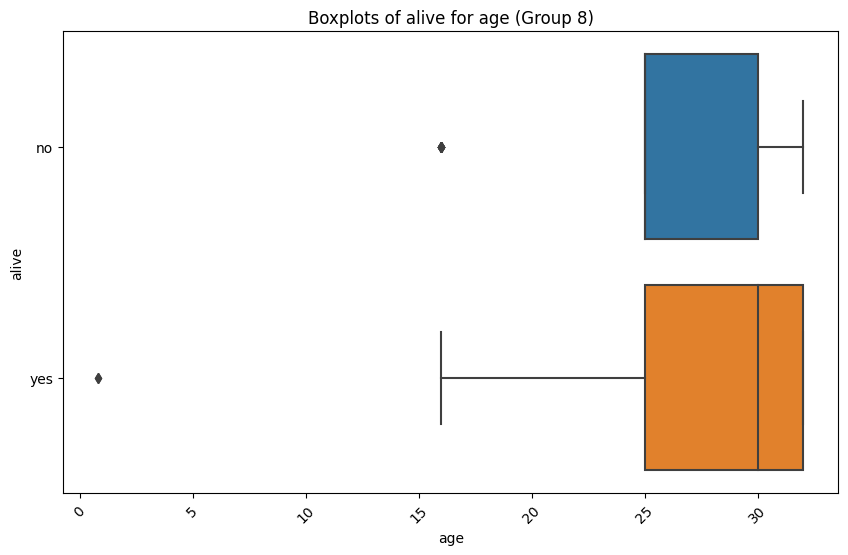

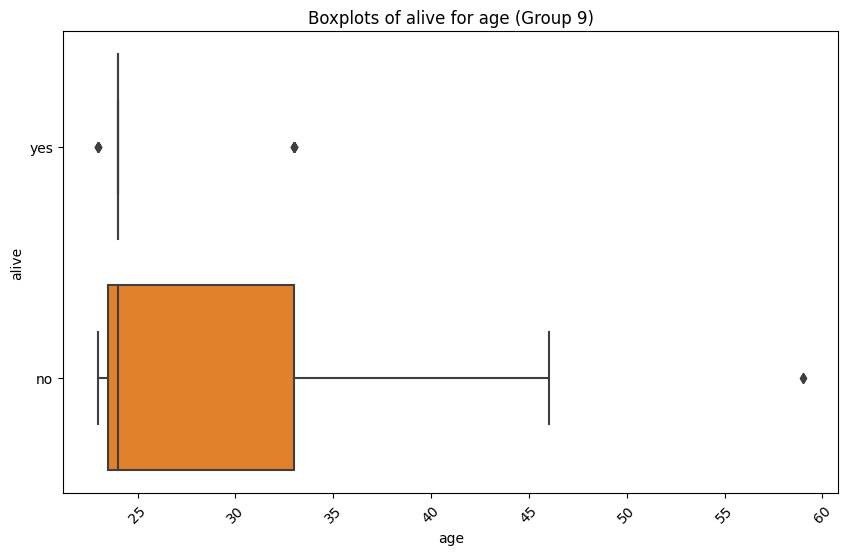

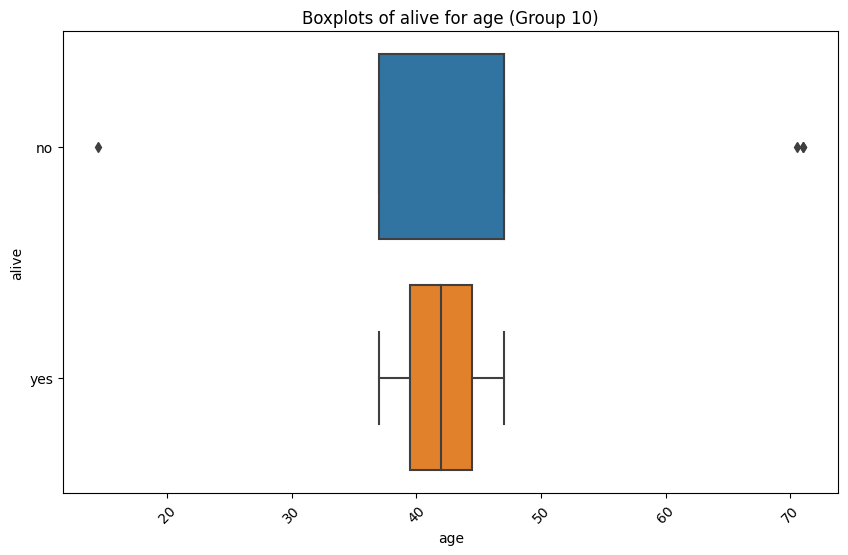

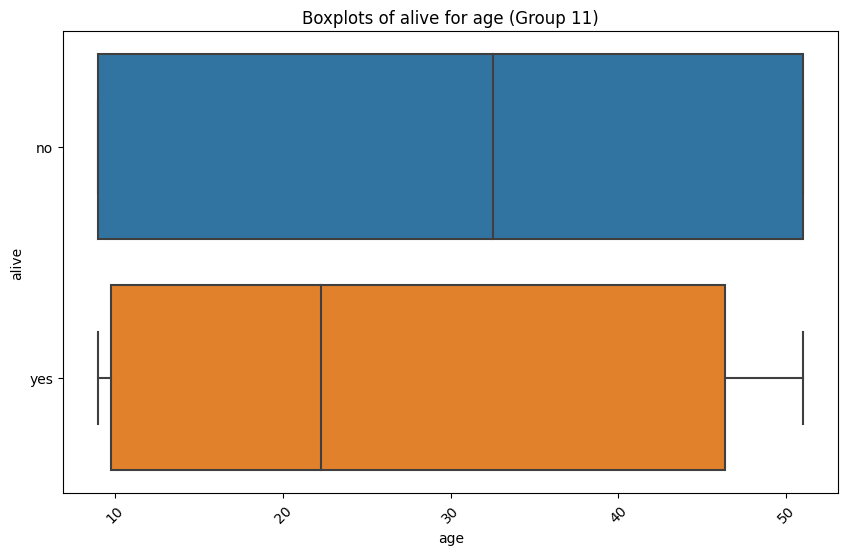

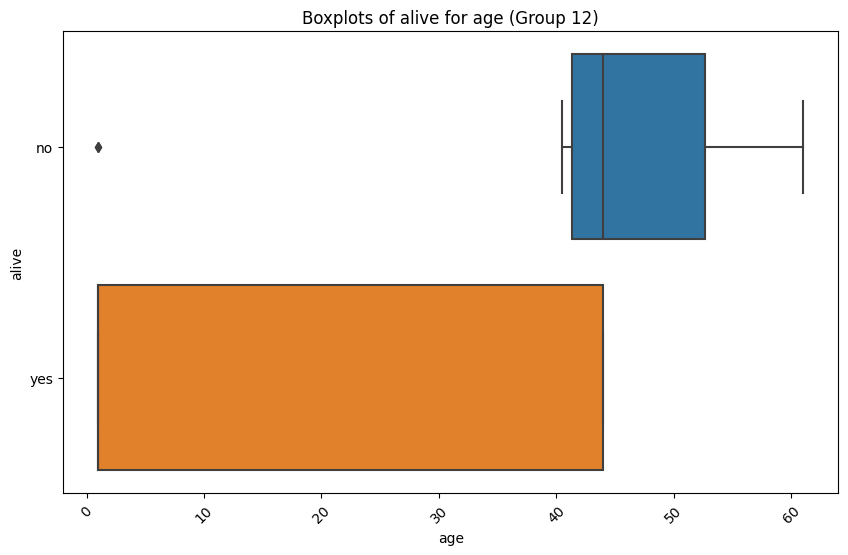

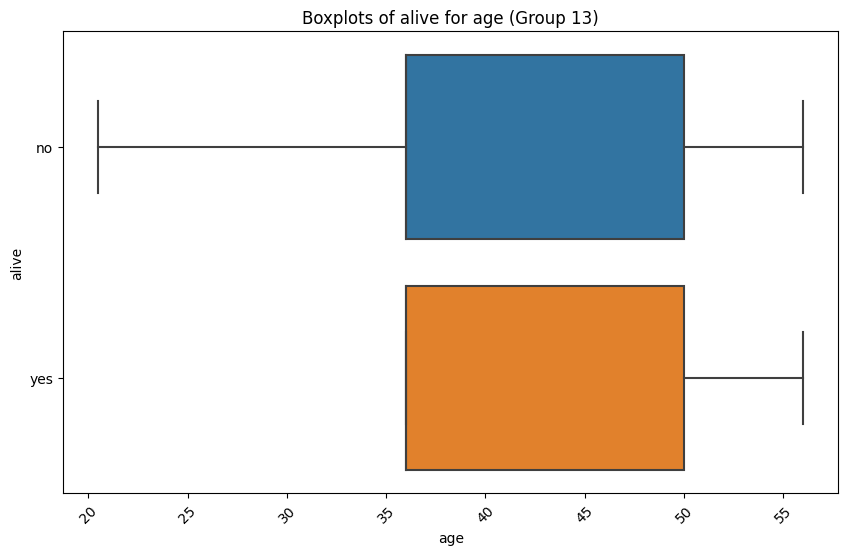

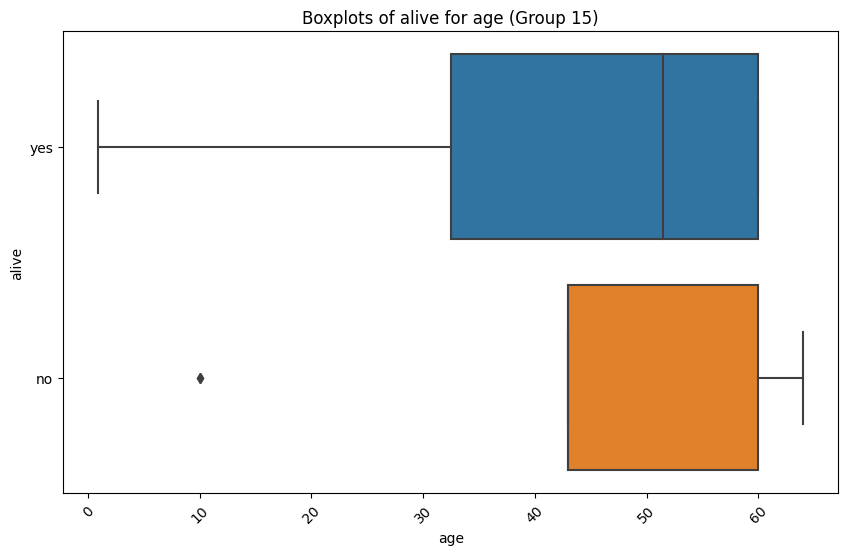

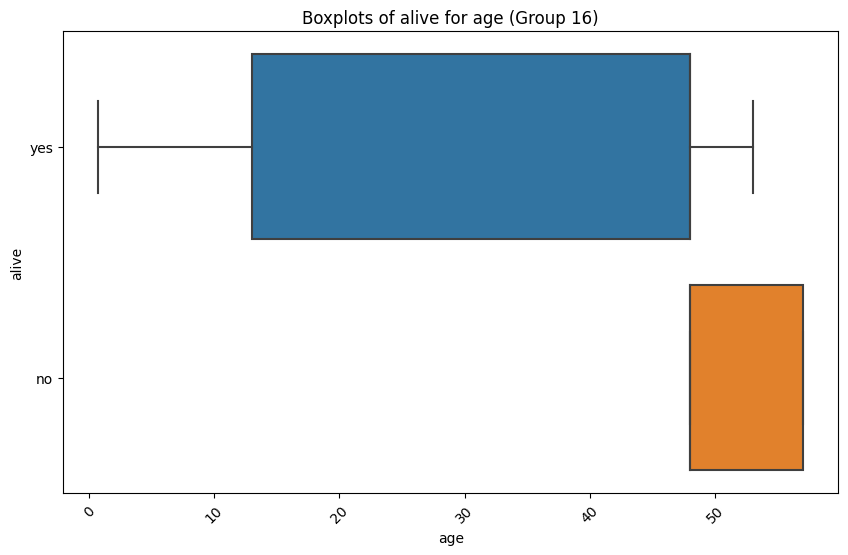

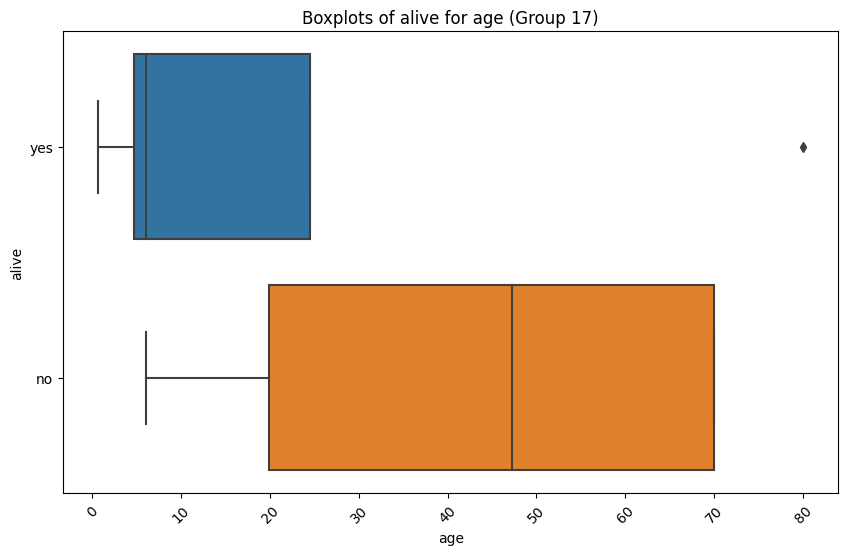

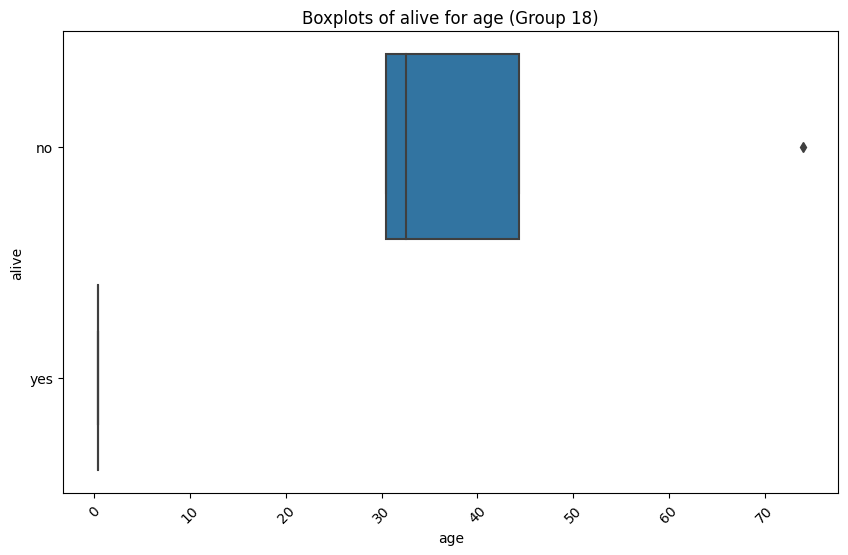

In [138]:
plot_grouped_boxplots(df_titanic,"age","alive")

In [ ]:
df_titanic.groupby('alive')['fare'].sum().reset_index()

alive        fare
0    no  12142.7199
1   yes  16551.2294

In [163]:
tabla_contingencia = pd.crosstab(df_titanic['age'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 113.79431126384412
P-Value: 0.03358316459333609
Grados de Libertad: 88
Tabla de Frecuencias Esperadas:
 [[  0.61616162   0.38383838]
 [  0.61616162   0.38383838]
 [  1.23232323   0.76767677]
 [  1.23232323   0.76767677]
 [  0.61616162   0.38383838]
 [  4.31313131   2.68686869]
 [  6.16161616   3.83838384]
 [  3.6969697    2.3030303 ]
 [  6.16161616   3.83838384]
 [  2.46464646   1.53535354]
 [  1.84848485   1.15151515]
 [  1.84848485   1.15151515]
 [  2.46464646   1.53535354]
 [  4.92929293   3.07070707]
 [  1.23232323   0.76767677]
 [  2.46464646   1.53535354]
 [  0.61616162   0.38383838]
 [  1.23232323   0.76767677]
 [  3.6969697    2.3030303 ]
 [  0.61616162   0.38383838]
 [  3.08080808   1.91919192]
 [ 10.47474747   6.52525253]
 [  8.01010101   4.98989899]
 [ 16.02020202   9.97979798]
 [ 15.4040404    9.5959596 ]
 [  9.24242424   5.75757576]
 [  0.61616162   0.38383838]
 [ 14.78787879   9.21212121]
 [ 16.63636364  10.36363636]
 [  9.24242424   5.75757576]
 [  0.

In [164]:
tabla_contingencia = pd.crosstab(df_titanic['fare'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 425.8083805791106
P-Value: 1.1647635739939964e-11
Grados de Libertad: 247
Tabla de Frecuencias Esperadas:
 [[ 9.24242424  5.75757576]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 1.23232323  0.76767677]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [ 4.31313131  2.68686869]
 [ 1.23232323  0.76767677]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 7.39393939  4.60606061]
 [ 9.24242424  5.75757576]
 [ 8.01010101  4.98989899]
 [ 0.61616162  0.38383838]
 [ 1.84848485  1.15151515]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [20.94949495 13.05050505]
 [ 9.85858586  6.14141414]
 [ 0.6161

las variebles edad y precio del billete presentan un indice correlacional cercano al 0, por lo que no estan correlacionadas, y anterirmente se ha contestado a la poca o escasa significacion entasdistica entre alive y edad y alive con precio del billete, como se puede observar en los test de chi cuadrado.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [144]:
df_viajes= pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.head(5)

aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23

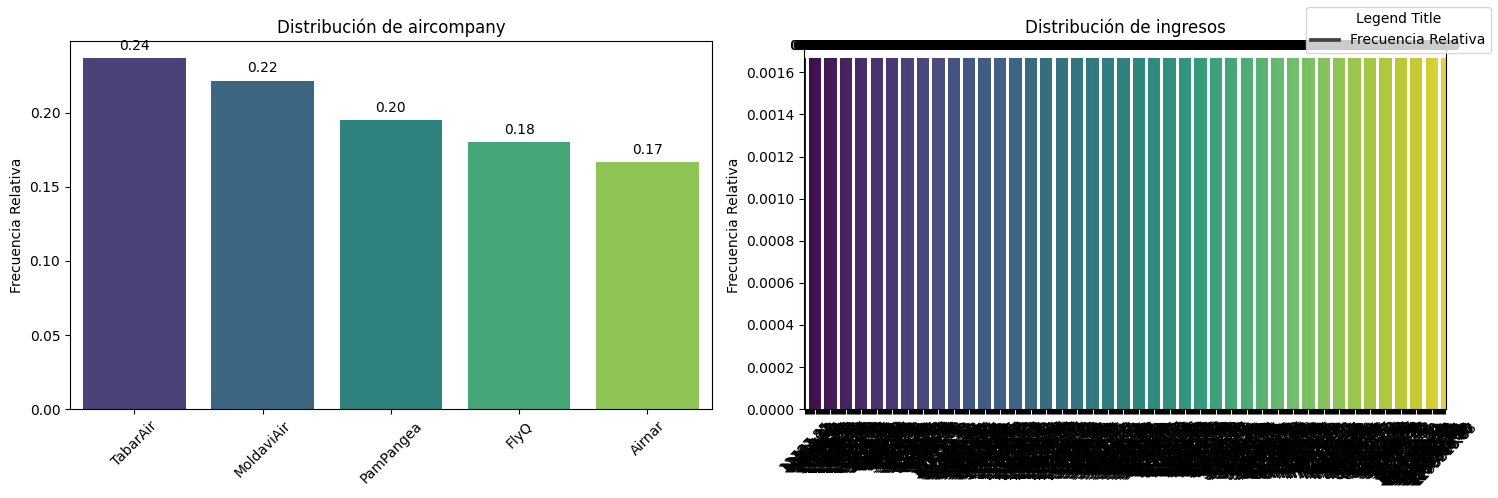

In [ ]:
pinta_distribucion_categoricas(df_viajes,["aircompany","ingresos"], relativa= True, mostrar_valores= True)

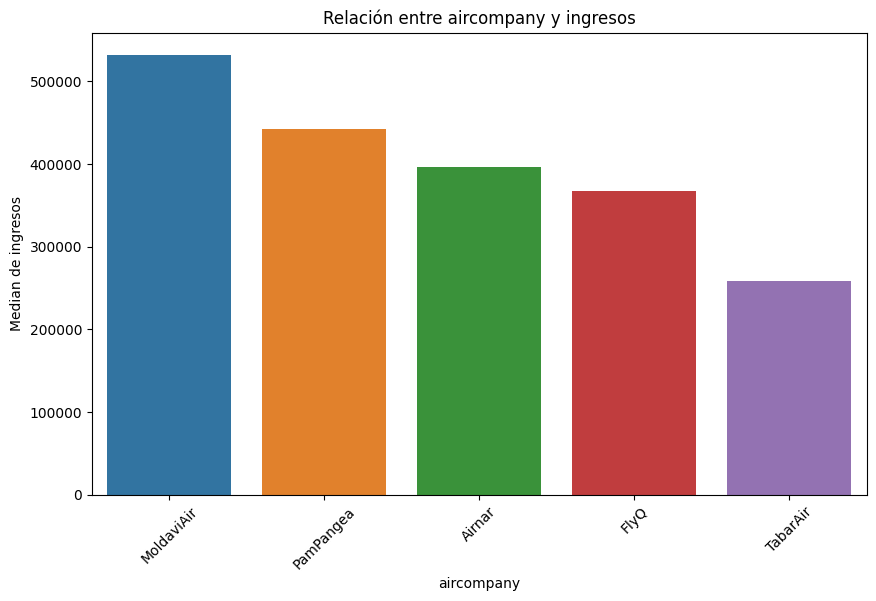

In [145]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median")

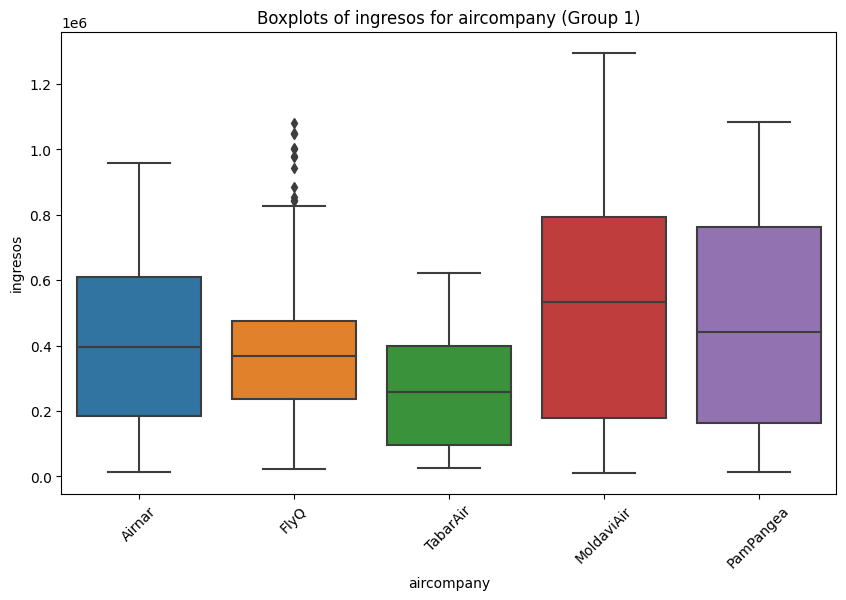

In [146]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


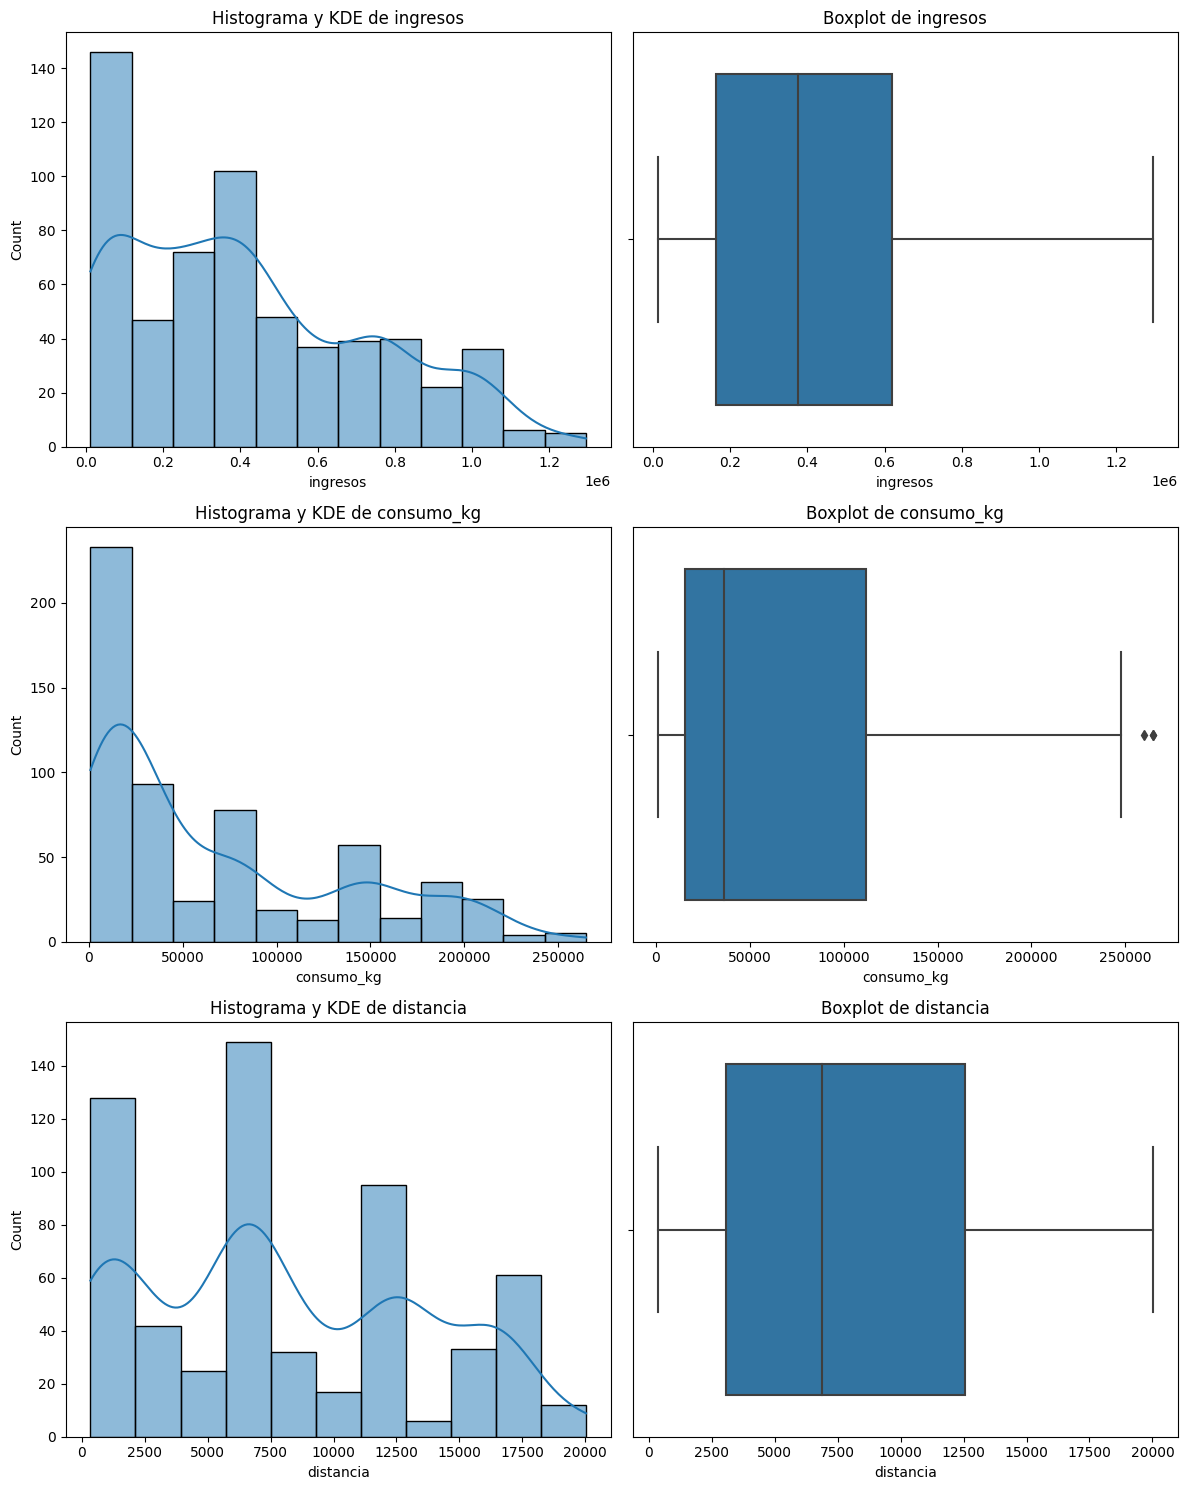

In [ ]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

In [ ]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
corr_matrix = df_viajes.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

distancia  con_escala  consumo_kg  duracion  ingresos
distancia    1.000000    0.669866    0.762341  0.985963  0.928833
con_escala   0.669866    1.000000    0.322295  0.761097  0.515817
consumo_kg   0.762341    0.322295    1.000000  0.668707  0.944875
duracion     0.985963    0.761097    0.668707  1.000000  0.867515
ingresos     0.928833    0.515817    0.944875  0.867515  1.000000

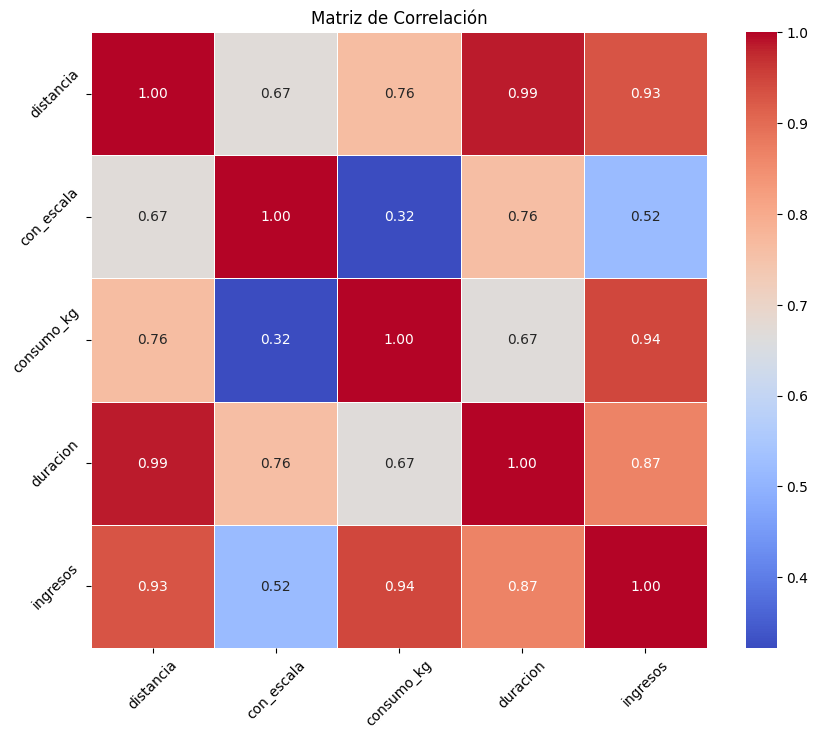

In [ ]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [ ]:
df_solo_numeros = df_viajes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

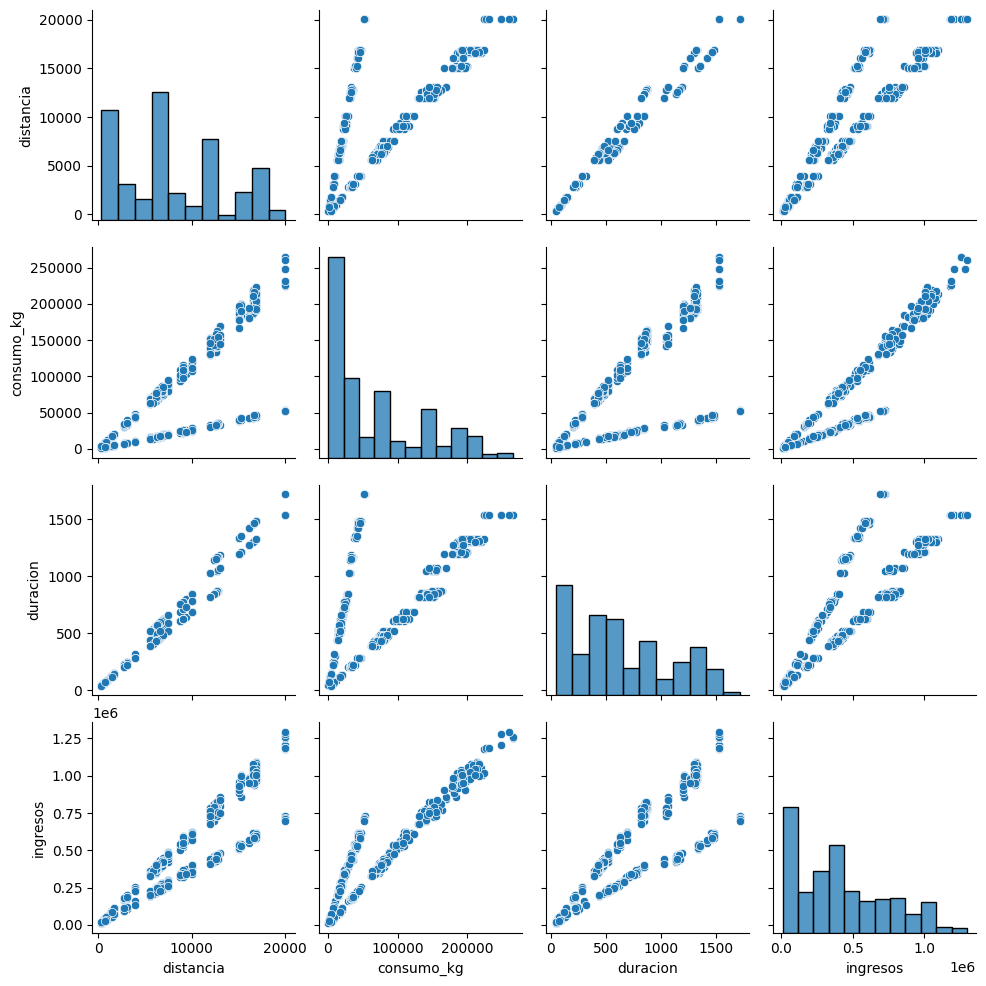

In [ ]:
sns.pairplot(df_solo_numeros)
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [175]:
df_viajes.head(1)

aircompany origen  destino  distancia       avion  con_escala  consumo_kg  \
0     Airnar  París  Ginebra        411  Boeing 737       False   1028.6919   

   duracion  ingresos        id_vuelo    mes  comsumo_medio_kg  
0        51  14232.65  Air_PaGi_10737  Jun23            2.5029

In [176]:
# consumo medio
df_viajes["comsumo_medio_kg"] = df_viajes["consumo_kg"]/ df_viajes["distancia"]
#ingresos por kg de combustible
df_viajes["ingresos/consumo_kg"] = df_viajes["ingresos"]/ df_viajes["consumo_kg"]


df_viajes.head(10)

aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   
5  MoldaviAir       Cádiz    Melbourne      20029   Boeing 737        True   
6  MoldaviAir       París      Londres        344  Airbus A320       False   
7   PamPangea       París    Melbourne      16925  Airbus A380        True   
8   PamPangea  Nueva York         Bali      16589   Boeing 737        True   
9      Airnar     Ginebra        Cádiz       1725  Airbus A380       False   

      consumo_kg  duracion    ingresos        id_vuelo    mes  \
0    1028.691900        51    14232.65  Air_PaGi_10737  Jun23   
1   33479.132544      1167   468527.19  Fly_BaRo_10737  Jun23   
2  109439.907200       626   584789.19  Tab_GiLo_11380  Jun23   
3   17027.010000       503   233342.51  Mol_PaCi_10737  Jun23   
4   86115.744000       518   438535.07  Tab_CiRo_10747  Jun23   
5   53148.153240      1721   728045.68  Mol_CaMe_10737  Jun23   
6     915.246400        44    13805.52  Mol_PaLo_11320  Jun23   
7  217722.658400      1328  1056735.47  Pam_PaMe_11380  Jun23   
8   45277.618464      1459   600836.96  Pam_NuBa_10737  Jun23   
9   20339.820000       135   110108.07  Air_GiCa_11380  Jun23   

   comsumo_medio_kg  ingresos/consumo_kg  
0          2.502900            13.835678  
1          2.628288            13.994604  
2         12.022400             5.343473  
3          2.673000            13.704256  
4         11.512800             5.092391  
5          2.653560            13.698419  
6          2.660600            15.083938  
7         12.863968             4.853585  
8          2.729376            13.270065  
9         11.791200             5.413424

In [178]:
pinta_distribucion_categoricas(df_viajes,["comsumo_medio_kg","ingresos/consumo_kg"], relativa= True, mostrar_valores= True)

(3, 2)


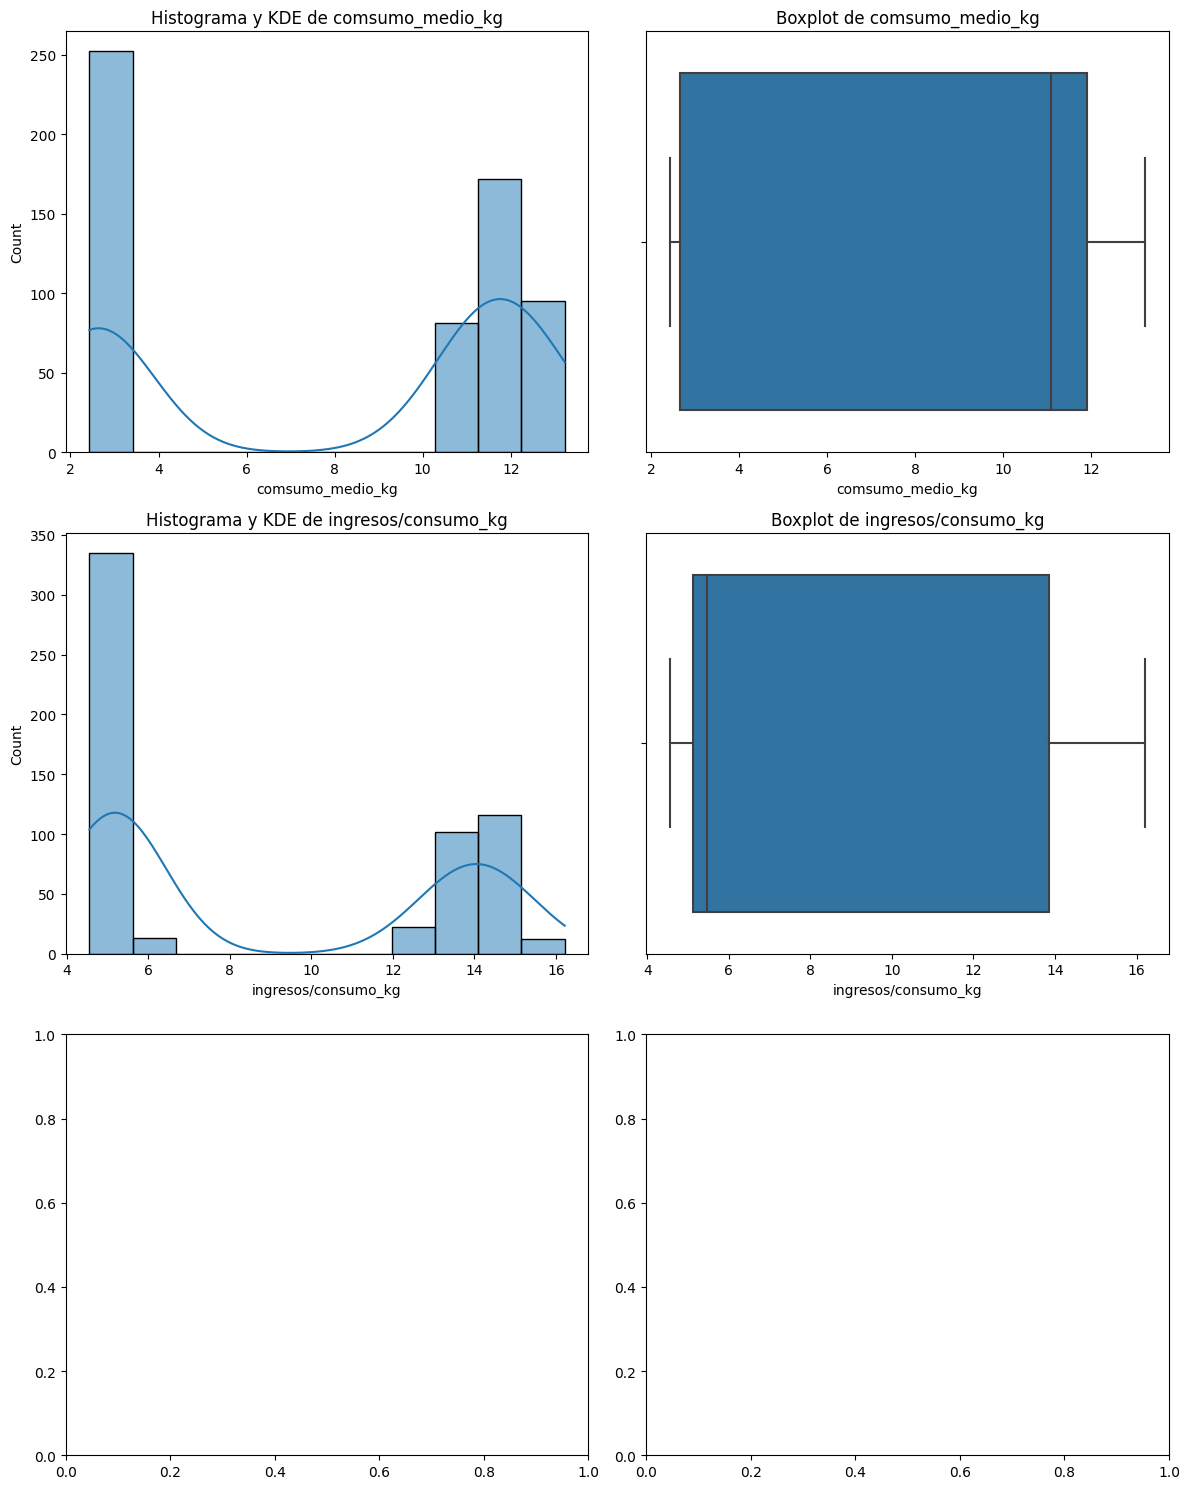

In [179]:
plot_combined_graphs(df_viajes,["comsumo_medio_kg","ingresos/consumo_kg","avion"])

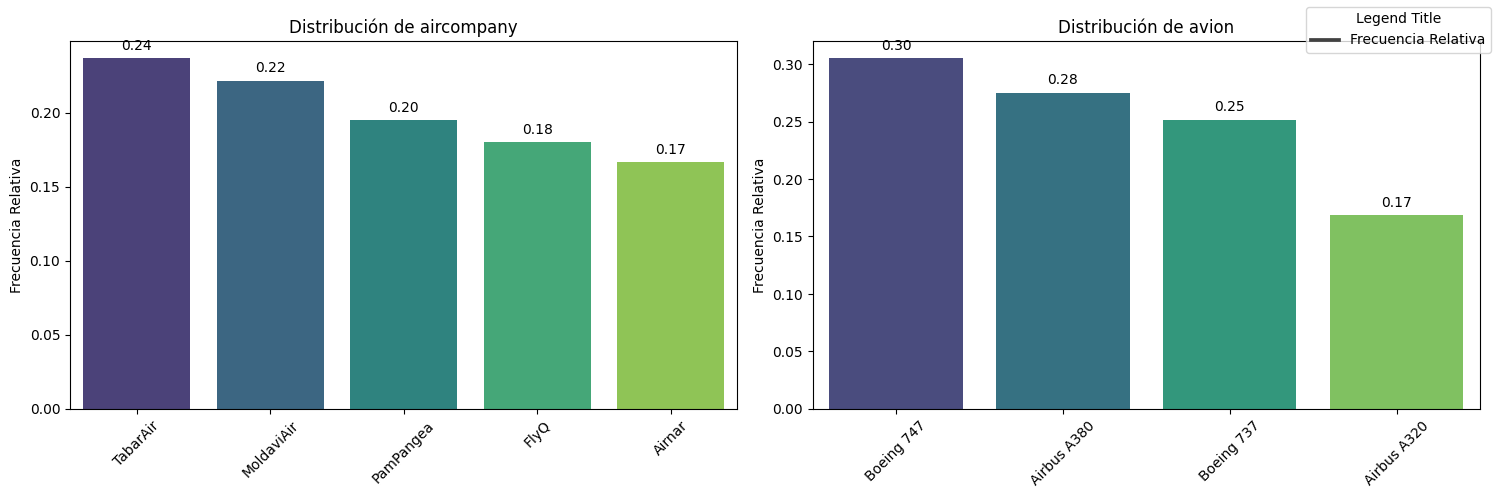

In [180]:
#aviones por compañia
pinta_distribucion_categoricas(df_viajes,["aircompany","avion"], relativa= True, mostrar_valores= True)


In [181]:
plot_categorical_relationship_fin(df_viajes,"aircompany","avion",relative_freq=False, show_values=False, size_group = 5)

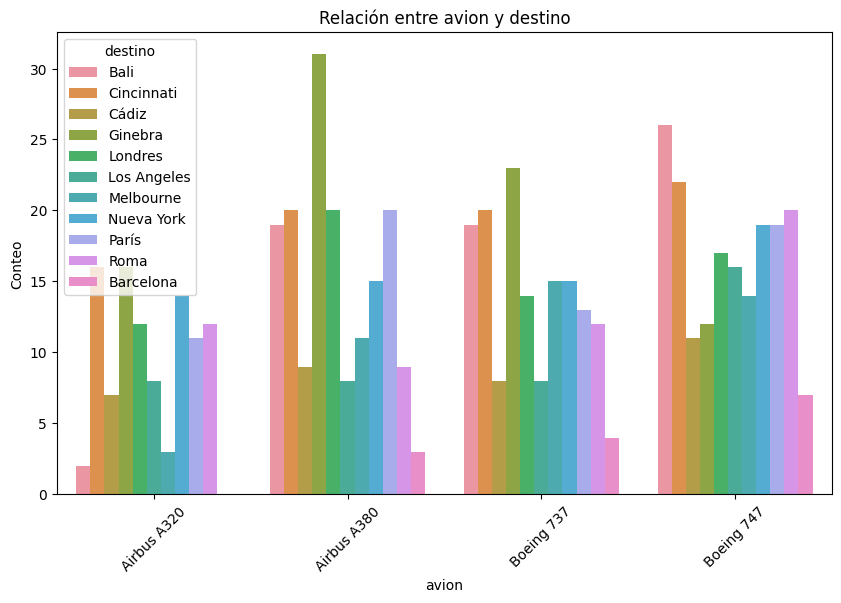

In [184]:
plot_categorical_relationship_fin(df_viajes,"avion", "destino",relative_freq=False, show_values=False, size_group = 5)

In [185]:
df_viajes.head(1)

aircompany origen  destino  distancia       avion  con_escala  consumo_kg  \
0     Airnar  París  Ginebra        411  Boeing 737       False   1028.6919   

   duracion  ingresos        id_vuelo    mes  comsumo_medio_kg  \
0        51  14232.65  Air_PaGi_10737  Jun23            2.5029   

   ingresos/consumo_kg  
0            13.835678

In [199]:
#porcompañia: tabaair y pampangea son las compañias mas efecicentes

# Calcular el consumo medio 
df_viajes['consumo_medio_por_km'] = df_viajes['consumo_kg'] / df_viajes['distancia']

# Calcular el ingreso medio 
df_viajes['ingreso_medio_por_kg'] = df_viajes['ingresos'] / df_viajes['consumo_kg']

# Agrupar por compañía y calcular los valores medios
datos_companias = df_viajes.groupby('aircompany').agg({
    'distancia': 'mean',
    'consumo_kg': 'mean',
    'duracion': 'mean',
    'ingresos': 'sum',
    'consumo_medio_por_km': 'mean',
    'ingreso_medio_por_kg': 'mean'
}).reset_index()

# Ordenar el DataFrame por eficiencia (menor consumo por km y mayor ingreso medio por kg)
datos_companias_ordenados = datos_companias.sort_values(by=['consumo_medio_por_km', 'ingreso_medio_por_kg'])

# Mostrar el resultado
datos_companias_ordenados

aircompany     distancia    consumo_kg    duracion     ingresos  \
3   PamPangea   9457.196581  76508.857060  764.179487  55974794.70   
4    TabarAir   5380.098592  40494.809175  413.577465  38487996.70   
1        FlyQ   7650.824074  66544.261868  608.129630  43374852.87   
2  MoldaviAir  10421.248120  92661.437126  825.000000  72894268.81   
0      Airnar   7598.210000  67317.617066  579.840000  40529397.82   

   consumo_medio_por_km  ingreso_medio_por_kg  
3              7.406889              9.463550  
4              7.596773              9.271974  
1              7.856310              8.994360  
2              8.275766              8.511334  
0              8.663475              8.156545

In [200]:
# por aviones: los aviones que menos han consumido son Boeing 737 y Airbus A320

# Calcular el consumo medio 
df_viajes['consumo_medio_por_km'] = df_viajes['consumo_kg'] / df_viajes['distancia']

# Calcular el ingreso medio 
df_viajes['ingreso_medio_por_kg'] = df_viajes['ingresos'] / df_viajes['consumo_kg']

# Agrupar por avión y calcular los valores medios
datos_aviones = df_viajes.groupby('avion').agg({
    'distancia': 'mean',
    'consumo_kg': 'mean',
    'duracion': 'mean',
    'ingresos': 'sum',
    'consumo_medio_por_km': 'mean',
    'ingreso_medio_por_kg': 'mean'
}).reset_index()

# Ordenar el DataFrame por eficiencia (menor consumo por km y mayor ingreso medio por kg)
datos_aviones_ordenados = datos_aviones.sort_values(by=['consumo_medio_por_km', 'ingreso_medio_por_kg'])

# Mostrar el resultado
datos_aviones_ordenados

avion    distancia     consumo_kg    duracion     ingresos  \
2   Boeing 737  8822.900662   23122.455666  762.695364  47312620.28   
0  Airbus A320  4628.316832   12628.158825  410.287129  18406653.85   
3   Boeing 747  8265.546448   94210.531316  617.666667  89588207.11   
1  Airbus A380  9274.478788  114768.789256  678.090909  95953829.66   

   consumo_medio_por_km  ingreso_medio_por_kg  
2              2.591481             13.707405  
0              2.707539             14.554919  
3             11.318520              5.231344  
1             12.271451              5.125501

In [201]:
# por origen: los paises de origen con menor consumo han sido Paris y Barcelona

# Calcular el consumo medio 
df_viajes['consumo_medio_por_km'] = df_viajes['consumo_kg'] / df_viajes['distancia']

# Calcular el ingreso medio 
df_viajes['ingreso_medio_por_kg'] = df_viajes['ingresos'] / df_viajes['consumo_kg']

# Agrupar por avión y calcular los valores medios
datos_aviones = df_viajes.groupby('origen').agg({
    'distancia': 'mean',
    'consumo_kg': 'mean',
    'duracion': 'mean',
    'ingresos': 'sum',
    'consumo_medio_por_km': 'mean',
    'ingreso_medio_por_kg': 'mean'
}).reset_index()

# Ordenar el DataFrame por eficiencia (menor consumo por km y mayor ingreso medio por kg)
datos_aviones_ordenados = datos_aviones.sort_values(by=['consumo_medio_por_km', 'ingreso_medio_por_kg'])

# Mostrar el resultado
datos_aviones_ordenados

origen     distancia     consumo_kg     duracion     ingresos  \
9         París   6223.208333   47136.223511   491.979167  14918256.53   
1     Barcelona   5044.722222   47369.694924   420.555556   5045185.74   
6   Los Angeles   7576.000000   57211.676784   579.333333  17097899.00   
10         Roma   6698.054054   48152.955456   515.648649  12185330.62   
5       Londres   5541.761905   45864.316674   435.666667  18017320.85   
4       Ginebra   5922.964706   47705.863080   459.929412  25622987.50   
8    Nueva York   7923.605634   66470.199957   624.845070  29165004.52   
3         Cádiz   9151.344828   75375.100998   742.965517  13528302.95   
2    Cincinnati   6255.500000   49326.077276   489.871429  22041791.83   
7     Melbourne  14933.680851  134397.684096  1214.127660  36954034.08   
0          Bali  12000.218391  113260.980007   935.448276  56685197.28   

    consumo_medio_por_km  ingreso_medio_por_kg  
9               6.778726             10.101871  
1               7.117599              9.916192  
6               7.410181              9.366006  
10              7.541112              9.326143  
5               7.627891              9.152095  
4               7.686103              9.185332  
8               7.836554              8.974345  
3               8.075557              8.810761  
2               8.109405              8.627989  
7               8.509166              8.305737  
0               9.227900              7.685461

In [214]:
df_viajes["consumo_medio_por_km"].max()

13.224640000000004

In [202]:
# por Destino: los destinos que menos han consumo han sido Ginebra, Roma,cincinati,nuevayork. cadiz y los angeles( estan entre 7,46 a 7,99 el consumo medio)

# Calcular el consumo medio 
df_viajes['consumo_medio_por_km'] = df_viajes['consumo_kg'] / df_viajes['distancia']

# Calcular el ingreso medio 
df_viajes['ingreso_medio_por_kg'] = df_viajes['ingresos'] / df_viajes['consumo_kg']

# Agrupar por destino y calcular los valores medios
datos_aviones = df_viajes.groupby('destino').agg({
    'distancia': 'mean',
    'consumo_kg': 'mean',
    'duracion': 'mean',
    'ingresos': 'sum',
    'consumo_medio_por_km': 'mean',
    'ingreso_medio_por_kg': 'mean'
}).reset_index()

# Ordenar el DataFrame por eficiencia (menor consumo por km y mayor ingreso medio por kg)
datos_aviones_ordenados = datos_aviones.sort_values(by=['consumo_medio_por_km', 'ingreso_medio_por_kg'])

# Mostrar el resultado
datos_aviones_ordenados

destino     distancia     consumo_kg     duracion     ingresos  \
4       Ginebra   6255.707317   51975.612529   483.695122  26692746.56   
10         Roma   6749.452830   53219.679314   529.981132  18194031.91   
2    Cincinnati   7745.846154   63240.537495   619.615385  31012256.11   
8    Nueva York   6955.619048   55990.085113   555.126984  22306754.26   
3         Cádiz   7648.514286   65212.146383   603.685714  13771284.73   
6   Los Angeles   7270.075000   56048.661582   541.150000  14623233.53   
5       Londres   7443.380952   65937.823800   590.984127  24730156.74   
7     Melbourne  13415.883721  110269.062115  1098.093023  29043339.69   
9         París   6944.730159   61502.173915   537.507937  23240027.51   
0          Bali  12233.409091  111444.489157   957.515152  43264867.46   
1     Barcelona   5735.214286   53681.027801   441.785714   4382612.40   

    consumo_medio_por_km  ingreso_medio_por_kg  
4               7.461092              9.460251  
10              7.477924              9.317990  
2               7.584669              9.256181  
8               7.627314              9.231925  
3               7.856408              8.968167  
6               7.996592              8.819267  
5               8.054023              8.832172  
7               8.071630              8.714175  
9               8.300064              8.593325  
0               8.819341              7.889688  
1               9.020519              7.844943

In [206]:
# rutas reales por compañia

# Agrupar por origen, destino y compañía y contar las ocurrencias
rutas_unicas = df_viajes.groupby(['origen', 'destino', 'aircompany']).size().reset_index(name='ocurrencias')



# Mostrar el resultado
rutas_unicas


origen      destino  aircompany  ocurrencias
0           Bali    Barcelona        FlyQ            2
1           Bali   Cincinnati      Airnar            6
2           Bali   Cincinnati        FlyQ            1
3           Bali   Cincinnati  MoldaviAir            6
4           Bali        Cádiz      Airnar            2
5           Bali        Cádiz  MoldaviAir            3
6           Bali      Ginebra      Airnar            5
7           Bali      Ginebra        FlyQ            3
8           Bali      Ginebra   PamPangea            4
9           Bali      Londres  MoldaviAir            6
10          Bali      Londres   PamPangea            5
11          Bali  Los Angeles      Airnar            2
12          Bali    Melbourne  MoldaviAir            5
13          Bali    Melbourne   PamPangea            6
14          Bali   Nueva York        FlyQ            5
15          Bali   Nueva York   PamPangea            3
16          Bali        París      Airnar            3
17          Bali        París  MoldaviAir            6
18          Bali        París   PamPangea            4
19          Bali         Roma        FlyQ           10
20     Barcelona         Bali        FlyQ            4
21     Barcelona   Cincinnati        FlyQ            2
22     Barcelona      Ginebra        FlyQ            6
23     Barcelona   Nueva York        FlyQ            3
24     Barcelona         Roma        FlyQ            3
25    Cincinnati         Bali      Airnar            1
26    Cincinnati         Bali  MoldaviAir            1
27    Cincinnati    Barcelona        FlyQ            3
28    Cincinnati        Cádiz      Airnar            1
29    Cincinnati        Cádiz  MoldaviAir            5
30    Cincinnati      Ginebra      Airnar            3
31    Cincinnati      Ginebra        FlyQ            6
32    Cincinnati      Ginebra    TabarAir            2
33    Cincinnati      Londres  MoldaviAir            2
34    Cincinnati      Londres    TabarAir            2
35    Cincinnati  Los Angeles      Airnar            7
36    Cincinnati  Los Angeles    TabarAir            5
37    Cincinnati    Melbourne  MoldaviAir            5
38    Cincinnati   Nueva York        FlyQ            4
39    Cincinnati   Nueva York    TabarAir            5
40    Cincinnati        París      Airnar            6
41    Cincinnati        París  MoldaviAir            3
42    Cincinnati         Roma        FlyQ            4
43    Cincinnati         Roma    TabarAir            5
44         Cádiz         Bali      Airnar            2
45         Cádiz         Bali  MoldaviAir            5
46         Cádiz   Cincinnati      Airnar            2
47         Cádiz   Cincinnati  MoldaviAir            1
48         Cádiz      Ginebra      Airnar            2
49         Cádiz      Londres  MoldaviAir            2
50         Cádiz  Los Angeles      Airnar            2
51         Cádiz    Melbourne  MoldaviAir            6
52         Cádiz        París      Airnar            2
53         Cádiz        París  MoldaviAir            5
54       Ginebra         Bali      Airnar            3
55       Ginebra         Bali        FlyQ            3
56       Ginebra         Bali   PamPangea            3
57       Ginebra    Barcelona        FlyQ            2
58       Ginebra   Cincinnati      Airnar            6
59       Ginebra   Cincinnati        FlyQ            3
60       Ginebra   Cincinnati    TabarAir            5
61       Ginebra        Cádiz      Airnar            1
62       Ginebra      Londres   PamPangea            5
63       Ginebra      Londres    TabarAir            6
64       Ginebra  Los Angeles      Airnar            6
65       Ginebra  Los Angeles    TabarAir            6
66       Ginebra    Melbourne   PamPangea            5
67       Ginebra   Nueva York        FlyQ            5
68       Ginebra   Nueva York   PamPangea            3
69       Ginebra   Nueva York    TabarAir            5
70       Ginebra        París      Airnar            5
71       Ginebra        París   PamPangea         

Hasta ahora he observado que las compañias mas eficiente son TabarAir y PamPamgea, que los aviones mas efciientes son Boeing 737 y Airbus A320, que los Origenes de los vuelos mas efcicientes osn Paris y Barcelona y los de destinos son 'Ginebra', 'Roma', 'Cincinnati', 'Nueva York', 'Cádiz', 'Los Angeles'

In [213]:
# rutas reales por compañia y filtradas

# Agrupar por origen, destino y compañía y contar las ocurrencias
rutas = df_viajes.groupby(['origen', 'destino', 'aircompany']).size().reset_index(name='ocurrencias')

# Filtrar por destinos y orígenes específicos
L_Destinos = ['Ginebra', 'Roma', 'Cincinnati', 'Nueva York', 'Cádiz', 'Los Angeles']
L_Origen = ['París', 'Barcelona']

# Filtrar las filas que tienen destinos y orígenes específicos
rutas_filtradas = rutas[(rutas['origen'].isin(L_Origen)) & (rutas['destino'].isin(L_Destinos))]

# Mostrar el resultado
rutas_filtradas


origen      destino  aircompany  ocurrencias
21   Barcelona   Cincinnati        FlyQ            2
22   Barcelona      Ginebra        FlyQ            6
23   Barcelona   Nueva York        FlyQ            3
24   Barcelona         Roma        FlyQ            3
127      París   Cincinnati      Airnar            3
128      París   Cincinnati  MoldaviAir            3
129      París        Cádiz      Airnar            6
130      París        Cádiz  MoldaviAir            3
131      París      Ginebra      Airnar            3
132      París      Ginebra   PamPangea            5
135      París  Los Angeles      Airnar            1
138      París   Nueva York   PamPangea            2

In [254]:
df_viajes["consumo_medio_por_km"].sort_values(ascending=False)

260    13.224640
253    13.224640
279    13.224640
39     13.224640
354    13.224640
294    13.104416
485    13.104416
329    13.104416
323    13.104416
568    12.984192
523    12.984192
396    12.984192
233    12.984192
85     12.984192
346    12.984192
7      12.863968
415    12.743744
581    12.743744
263    12.743744
72     12.743744
276    12.743744
240    12.716000
256    12.716000
483    12.716000
506    12.716000
331    12.716000
339    12.716000
419    12.716000
557    12.716000
76     12.716000
80     12.716000
123    12.716000
60     12.623520
184    12.623520
368    12.623520
429    12.600400
287    12.600400
54     12.600400
513    12.600400
571    12.600400
239    12.600400
531    12.600400
433    12.600400
166    12.600400
265    12.503296
538    12.503296
555    12.484800
246    12.484800
81     12.484800
550    12.484800
11     12.484800
535    12.484800
142    12.383072
519    12.383072
210    12.383072
371    12.383072
587    12.369200
404    12.369200
141    12.3692

In [260]:
#crear categorias de eficiancia

condiciones = [
    (df_viajes['consumo_medio_por_km'] <= 10),
    (10 < df_viajes['consumo_medio_por_km']) & (df_viajes['consumo_medio_por_km'] <= 11.28),
    (df_viajes['consumo_medio_por_km'] > 11.28)
]

# Definir las categorías
categorias = ['supereficientes', 'medio_eficientes', 'nada_eficientes']

# Crear la columna 'viajes_eficientes' basada en las condiciones,definiendo los intervalos o "bins" para categorizar los valores a los  tres intervalos establecidos y con labels asignando etiquetas a las categorías establecidas
df_viajes['viajes_eficientes'] = pd.cut(df_viajes['consumo_medio_por_km'], bins=[-float('inf'), 10, 11.28, float('inf')], labels=categorias)


df_viajes.head(10)

aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   
5  MoldaviAir       Cádiz    Melbourne      20029   Boeing 737        True   
6  MoldaviAir       París      Londres        344  Airbus A320       False   
7   PamPangea       París    Melbourne      16925  Airbus A380        True   
8   PamPangea  Nueva York         Bali      16589   Boeing 737        True   
9      Airnar     Ginebra        Cádiz       1725  Airbus A380       False   

      consumo_kg  duracion    ingresos        id_vuelo    mes  \
0    1028.691900        51    14232.65  Air_PaGi_10737  Jun23   
1   33479.132544      1167   468527.19  Fly_BaRo_10737  Jun23   
2  109439.907200       626   584789.19  Tab_GiLo_11380  Jun23   
3   17027.010000       503   233342.51  Mol_PaCi_10737  Jun23   
4   86115.744000       518   438535.07  Tab_CiRo_10747  Jun23   
5   53148.153240      1721   728045.68  Mol_CaMe_10737  Jun23   
6     915.246400        44    13805.52  Mol_PaLo_11320  Jun23   
7  217722.658400      1328  1056735.47  Pam_PaMe_11380  Jun23   
8   45277.618464      1459   600836.96  Pam_NuBa_10737  Jun23   
9   20339.820000       135   110108.07  Air_GiCa_11380  Jun23   

   comsumo_medio_kg  ingresos/consumo_kg  consumo_medio_por_km  \
0          1.714487            13.835678              2.502900   
1         55.798554            13.994604              2.628288   
2        182.399845             5.343473             12.022400   
3         28.378350            13.704256              2.673000   
4        143.526240             5.092391             11.512800   
5         88.580255            13.698419              2.653560   
6          1.525411            15.083938              2.660600   
7        362.871097             4.853585             12.863968   
8         75.462697            13.270065              2.729376   
9         33.899700             5.413424             11.791200   

   ingreso_medio_por_kg viajes_eficientes  
0             13.835678   supereficientes  
1             13.994604   supereficientes  
2              5.343473   nada_eficientes  
3             13.704256   supereficientes  
4              5.092391   nada_eficientes  
5             13.698419   supereficientes  
6             15.083938   supereficientes  
7              4.853585   nada_eficientes  
8             13.270065   supereficientes  
9              5.413424   nada_eficientes

In [264]:
# he establecido 3 niveles mas o menos equidistantes, teniendo encuenta los valores maximo(13.22) y mini(2.43) de la columna consumo por km, pero q entre 2.43 hasta 2.87 y el siguiente es 10.66 hasta llehar al max 13.22

In [240]:
#voya analizar la nueca coluna eficiencia por cada compañia

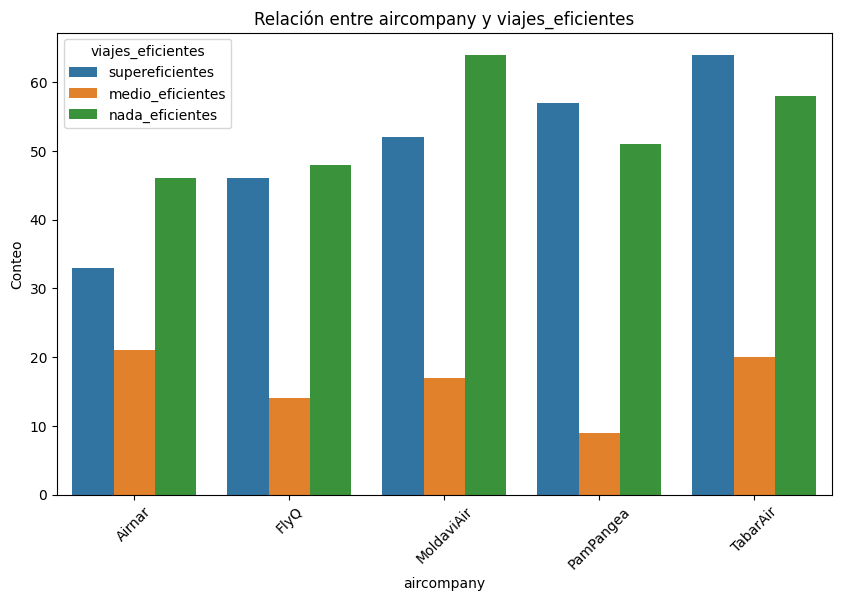

In [261]:
plot_categorical_relationship_fin(df_viajes,"aircompany","viajes_eficientes",relative_freq=False, show_values=False, size_group = 5)

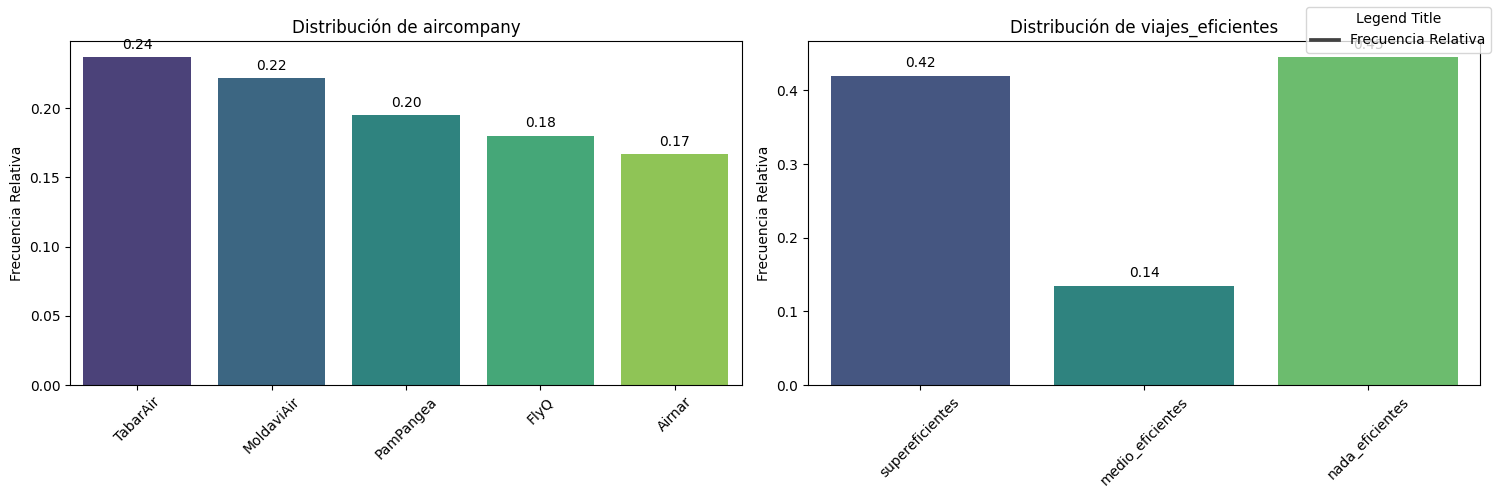

In [262]:
pinta_distribucion_categoricas(df_viajes,["aircompany","viajes_eficientes"], relativa= True, mostrar_valores= True)

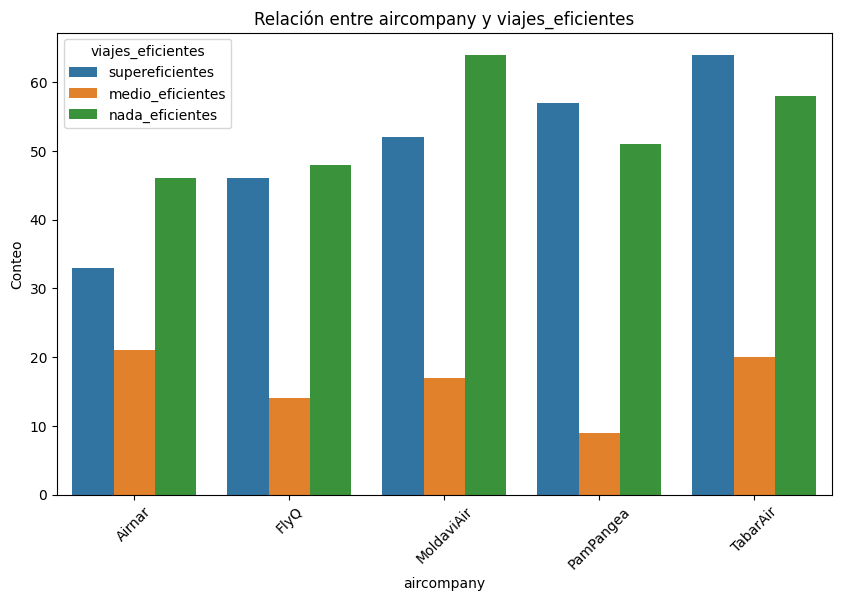

In [265]:
plot_categorical_relationship_fin(df_viajes,"aircompany","viajes_eficientes",relative_freq=False, show_values=False, size_group = 5)

In [278]:
# NUEMERO DE VUELOS SUPERFECIENETS POR COMPAÑIA
viajes_supereficientes = df_viajes[df_viajes['viajes_eficientes'] == 'supereficientes']

#  número de vuelos TOTALES   por compañía
num_compañia = viajes_supereficientes.groupby('aircompany').size().reset_index(name='vuelos_supereficientes')

# Mostrar el resultado
print(num_compañia)

   aircompany  vuelos_supereficientes
0      Airnar                      33
1        FlyQ                      46
2  MoldaviAir                      52
3   PamPangea                      57
4    TabarAir                      64


La copañia que presenta mayor numero de vuelos superefcientes es TabarAir, que a su era la que mas viajes realziaba y menos ingresos obtenia.